<div style="display: flex; align-items: center; justify-content: left; height: 100px; border: 5px solid #000080; background-color: #ADD8E6; padding: 10px; font-family: Arial, sans-serif;">
    <h1 style="color: #000080; margin: 0; font-size: 48px;">Hw06 By: David Jean</h1>
</div>


<div style="border-bottom: 5px solid #5DADE2; background-color: #EAF2F8; padding: 10px 20px; font-family: 'Arial', sans-serif;">
    <h2 style="color: #34495E; font-size: 32px; margin: 0;">Data 6500: Cases In Data Science, Fall 2023</h2>
</div>


<div style="border-left: 5px solid #5DADE2; padding: 20px; background-color: #EAF2F8; font-family: Arial, sans-serif;">
    <h2 style="color: #34495E; font-size: 32px; margin: 0;">Binary Image Classification with KNN, SVC-Linear, SVC-RBF, Logistic Regression, and Decision Tree Classifier models</h2>
</div>


<div style="border-left: 5px solid #5DADE2; padding: 20px; background-color: #EAF2F8; font-family: Arial, sans-serif;">
  <div style="width: 50%;">
    <ul style="list-style-type: none; padding-left: 0; color: #34495E;">
      <li style="margin-bottom: 10px;">• <b>Abstract:</b> In this study, we focus on binary classification challenges within the MNIST dataset, specifically digit pairs 6 vs 9, 1 vs 7, and 3 vs 5. Our approach utilized a range of models: kNN, Logistic Regression, Decision Trees, Linear SVC, and Gaussian RBF kernel SVC. Each model's performance was fine-tuned through hyperparameter optimization and evaluated based on training, cross-validation, and test set accuracies. The results provided valuable insights into the linear separability of these digit pairs and the relative difficulty of these classification tasks. The investigation highlighted that while some models excel in linearly separable scenarios, others are better suited for complex, non-linear classification challenges, reflecting the unique visual characteristics and ambiguities inherent in these specific digit comparisons.</li>
    </ul>
  </div>
</div>

<div style="display: flex; align-items: center; height: 100px; border: 5px solid #000080; background-color: #ADD8E6; padding: 10px;">
    <h3 style="color: #000080; margin: 0; font-size: 38px;">Import Libraries</h3>
</div>


In [27]:
# Standard libraries
import time
import sys
import warnings
import platform
import os
import datetime

# Data handling
import numpy as np
import pandas as pd

# Machine learning
from scipy.stats import reciprocal
from sklearn.model_selection import (
    KFold, cross_val_score, GridSearchCV, RandomizedSearchCV,
    RepeatedKFold, StratifiedShuffleSplit, train_test_split
)
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    mean_absolute_error, mean_squared_error, r2_score
)
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR, LinearSVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import ConvergenceWarning
from sklearn.kernel_approximation import RBFSampler

# Neural networks and deep learning
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Optimization
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval

# XGBoost
import xgboost as xgb

# System Utilities
import psutil

# Configure warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)




<div style="display: flex; align-items: center; height: 100px; border: 5px solid #000080; background-color: #ADD8E6; padding: 10px;">
    <h3 style="color: #000080; margin: 0; font-size: 38px;">Check Version Info</h3>
</div>

In [3]:
# Date and Time of Execution
print(f"Current date and time: {datetime.datetime.now()}")
print(f"The Python executable is: {sys.executable}")
print(f"The Python version is: {platform.python_version()}")
print(f"The TensorFlow version is: {tf.__version__}")
print(f"XGBoost version: {xgb.__version__}")
print(f"The system is: {platform.system()}")
print(f"Physical cores: {psutil.cpu_count(logical=False)}, Total cores: {psutil.cpu_count(logical=True)}")
print(f"RAM: {psutil.virtual_memory().total / (1024 ** 3):.2f} GB")
# Disk Space
print(f"Disk space available on current partition: {psutil.disk_usage('.').free / (1024 ** 3):.2f} GB")



if tf.config.list_physical_devices('GPU'):
    print("Tensorflow is using the GPU:", tf.config.list_physical_devices('GPU'))
else:
    print("Tensorflow is not using the GPU. Consider enabling GPU for faster performance.")

    # Virtual Environment
if 'VIRTUAL_ENV' in os.environ:
    print(f"Virtual ENV: {os.environ['VIRTUAL_ENV']}")
else:
    print("Not running inside a Virtual Environment")

Current date and time: 2023-11-11 20:55:37.367138
The Python executable is: c:\Users\DJ\anaconda3\envs\xgboosttf\python.exe
The Python version is: 3.9.18
The TensorFlow version is: 2.10.1
XGBoost version: 2.0.1
The system is: Windows
Physical cores: 24, Total cores: 32
RAM: 63.71 GB
Disk space available on current partition: 1578.38 GB
Tensorflow is using the GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Not running inside a Virtual Environment


<div style="border: 5px solid #5DADE2; background-color: #EAF2F8; padding: 40px; font-family: 'Arial', sans-serif;">
    <h2 style="color: #34495E; font-size: 48px; margin: 0;">1) Consider the Binary Classification of 6 vs 9</h2>
</div>


<div style="display: flex; align-items: center; height: 100px; border: 5px solid #000080; background-color: #ADD8E6; padding: 10px;">
    <h3 style="color: #000080; margin: 0; font-size: 38px;">1.1) Run KNN with optimal K selected via cross validation</h3>
</div>

In [4]:
#load the minst data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

The optimal hyperparameter \( k \) for the k-Nearest Neighbors algorithm is determined through a grid search, aiming to maximize cross-validation accuracy. This is formulated as the following optimization problem:

$$
\begin{aligned}
k^* = \underset{k \in \{1, 3, 5, 7, 9\}}{\mathrm{argmax}} \; \text{CV-Accuracy}(k)
\end{aligned}
$$

Once the best \( k \) is found, the k-Nearest Neighbors algorithm predicts the class of a sample based on the majority vote among its \( k \) nearest neighbors:

$$
\begin{aligned}
y_i = \mathrm{mode}\{ y_{i1}, y_{i2}, \ldots, y_{ik} \}
\end{aligned}
$$

where \( y_i \) is the predicted class for the \( i \)-th test sample, and \( y_{i1}, y_{i2}, \ldots, y_{ik} \) are the classes of the \( k \) nearest training samples to the \( i \)-th test sample.

The performance of the classifier is often summarized using a confusion matrix, which for a binary classification into classes \( 6 \) and \( 9 \), can be represented as:

$$
\begin{aligned}
C = \begin{bmatrix}
\text{True Positives for 6} & \text{False Positives for 9} \\
\text{False Negatives for 6} & \text{True Positives for 9}
\end{bmatrix}
\end{aligned}
$$






<div style="border-left: 5px solid #5DADE2; padding: 15px; background-color: #EAF2F8; font-family: Arial, sans-serif;">



<ul style="list-style-type: none; padding-left: 0; color: #34495E;">
    <li style="margin-bottom: 10px;">• <b>Note:</b> My Notebooks are set up where each model is fully end to end like this for efficency, making quick changes, and troubleshooting without having to run previous models.</li>
   
</ul>

  Model  Train Accuracy  CV Accuracy  Test Accuracy Time H-M-S
0   KNN             1.0      0.99941       0.999492   00:00:14


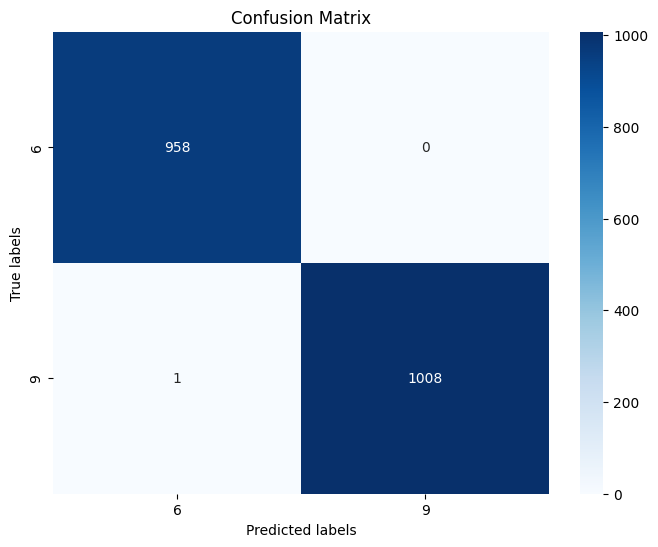

In [5]:
# Load the MNIST data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Start timing
start_time = time.time()

# Flatten the training and test images
n_samples_train = train_X.shape[0]
n_samples_test = test_X.shape[0]
train_X_flat = train_X.reshape((n_samples_train, -1)) / 255.0  # Normalize the training data
test_X_flat = test_X.reshape((n_samples_test, -1)) / 255.0    # Normalize the test data


# Filter out the samples for digits 6 and 9
X69_train = train_X_flat[(train_y == 6) | (train_y == 9)]
y69_train = train_y[(train_y == 6) | (train_y == 9)]
X69_test = test_X_flat[(test_y == 6) | (test_y == 9)]
y69_test = test_y[(test_y == 6) | (test_y == 9)]

# Set up cross-validation method
cv_method = RepeatedKFold(n_splits=10, n_repeats=3, random_state=6500)

# Define the parameter grid to search over
search_grid = {'n_neighbors': [1, 3, 5, 7, 9]}

# Set up the grid search with cross-validation
search = GridSearchCV(KNeighborsClassifier(), search_grid, cv=cv_method, n_jobs=-1, verbose=False)

# Perform the grid search to find the optimal k
search.fit(X69_train, y69_train)

# Extract the best score and the best parameter (k)
best_k = search.best_params_['n_neighbors']
cv_accuracy = search.best_score_

# Fit the kNN classifier with the optimal k found
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X69_train, y69_train)

# Evaluate the classifier
train_accuracy = knn.score(X69_train, y69_train)
test_accuracy = knn.score(X69_test, y69_test)

# End timing
end_time = time.time()
total_time = end_time - start_time

# Convert total time from seconds to hours, minutes, seconds
hours, remainder = divmod(total_time, 3600)
minutes, seconds = divmod(remainder, 60)
time_formatted = "{:02}:{:02}:{:02}".format(int(hours), int(minutes), int(seconds))

# Store the results in a DataFrame
results_data = {
    'Model': ['KNN'],
    'Train Accuracy': [train_accuracy],
    'CV Accuracy': [cv_accuracy],
    'Test Accuracy': [test_accuracy],
    'Time H-M-S': [time_formatted]  
}

Results69 = pd.DataFrame(results_data)

# Print the results DataFrame
print(Results69)

y_pred = knn.predict(X69_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y69_test, y_pred)

# Create a heatmap using seaborn to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['6', '9'], yticklabels=['6', '9'])

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


<div style="display: flex; align-items: center; height: 100px; border: 5px solid #000080; background-color: #ADD8E6; padding: 10px;">
    <h3 style="color: #000080; margin: 0; font-size: 38px;">1.2) Run Logistic Regression</h3>
</div>

The logistic regression model predicts the probability that a sample \( \mathbf{x} \) belongs to class \( y=1 \) (e.g., digit '9') using the logistic function:
$$
\begin{aligned}
P(y=1|\mathbf{x};\theta) &= \frac{1}{1 + e^{-\theta^\top \mathbf{x}}}
\end{aligned}
$$

The parameters \( \theta \) of the model are estimated by maximizing the likelihood of the observed data. Cross-validation is performed to evaluate the model's performance, which can be represented as:
$$
\begin{aligned}
\text{CV-Accuracy} &= \frac{1}{k}\sum_{i=1}^{k} \text{Accuracy}_{CV_i}
\end{aligned}
$$

where \( k \) is the number of cross-validation folds and \( \text{Accuracy}_{CV_i} \) is the accuracy score for the \( i \)-th fold.

After fitting the model to the training data, its predictive performance is assessed using a confusion matrix on the test data:
$$
\begin{aligned}
C &= \begin{bmatrix}
\text{True Positives} & \text{False Positives} \\
\text{False Negatives} & \text{True Positives}
\end{bmatrix}
\end{aligned}
$$

This matrix is visualized with a heatmap to better interpret the classifier's performance.






      Model  Train Accuracy  CV Accuracy  Test Accuracy Time H-M-S
0       KNN        1.000000     0.999410       0.999492   00:00:14
1  Logistic        0.999916     0.998483       0.996441   00:00:01


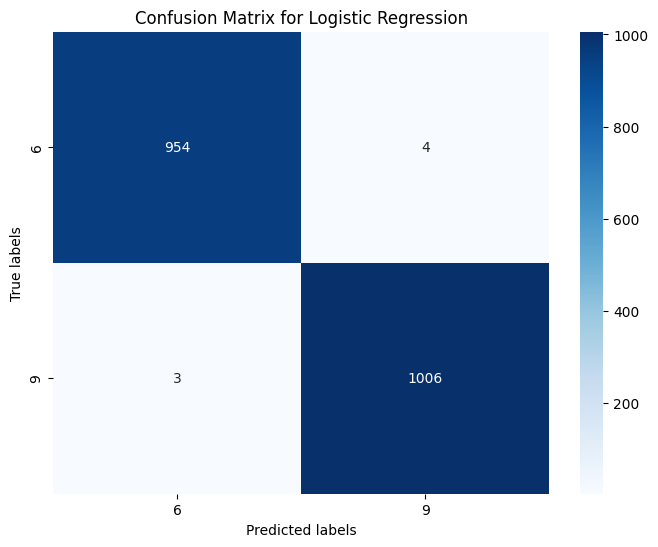

In [6]:
# Start timing
start_time = time.time()

# Load the MNIST data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Flatten the training and test images
n_samples_train = train_X.shape[0]
n_samples_test = test_X.shape[0]
train_X_flat = train_X.reshape((n_samples_train, -1)) / 255.0  # Normalize the training data
test_X_flat = test_X.reshape((n_samples_test, -1)) / 255.0    # Normalize the test data

# Filter out the samples for digits 6 and 9
X69_train = train_X_flat[(train_y == 6) | (train_y == 9)]
y69_train = train_y[(train_y == 6) | (train_y == 9)]
X69_test = test_X_flat[(test_y == 6) | (test_y == 9)]
y69_test = test_y[(test_y == 6) | (test_y == 9)]

# Initialize and train the logistic regression model
lr = LogisticRegression(solver='liblinear')

# Perform cross-validation and calculate the average CV accuracy
cv_scores = cross_val_score(lr, X69_train, y69_train, cv=5)
cv_accuracy = np.mean(cv_scores)

# Fit the logistic regression model with the whole training dataset
lr.fit(X69_train, y69_train)

# Evaluate the model on the training data
train_accuracy = lr.score(X69_train, y69_train)

# Evaluate the model on the test data
test_accuracy = lr.score(X69_test, y69_test)

# End timing
end_time = time.time()
total_time = end_time - start_time
hours, remainder = divmod(total_time, 3600)
minutes, seconds = divmod(remainder, 60)
formatted_time = f"{int(hours):02d}:{int(minutes):02d}:{int(seconds):02d}"

# Store the results in a DataFrame
logistic_results_data = {
    'Model': 'Logistic',
    'Train Accuracy': train_accuracy,
    'CV Accuracy': cv_accuracy,
    'Test Accuracy': test_accuracy,
    'Time H-M-S': formatted_time
}

logistic_results_df = pd.DataFrame([logistic_results_data])
Results69 = pd.concat([Results69, logistic_results_df], ignore_index=True)

# Print the results DataFrame
print(Results69)

y_pred = lr.predict(X69_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y69_test, y_pred)

# Create a heatmap using seaborn to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['6', '9'], yticklabels=['6', '9'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

<div style="display: flex; align-items: center; height: 100px; border: 5px solid #000080; background-color: #ADD8E6; padding: 10px;">
    <h3 style="color: #000080; margin: 0; font-size: 38px;">1.3) Run decision tree with optimal depth selected via cross validation</h3>
</div>

\begin{align*}
& \text{Let } X \text{ be the feature matrix, } y \text{ be the target vector.} \\
& \text{Divide } X \text{ and } y \text{ into } k \text{ folds.} \\
& \text{For each depth } d \in \{1, 2, \ldots, D\}: \\
& \quad \text{For each fold } i \in \{1, 2, \ldots, k\}: \\
& \quad \quad \text{Train on } X \setminus X_i, y \setminus y_i. \\
& \quad \quad \text{Validate on } X_i, y_i. \\
& \quad \text{Compute average performance across all folds.} \\
& \text{Select } d^* \text{ with the best performance.} \\
& \text{Train decision tree on } X, y \text{ using depth } d^*. \\
\end{align*}

Fitting 30 folds for each of 19 candidates, totalling 570 fits
Optimal tree depth: 11
Best ccp_alpha: 0.0003077588196716506
           Model  Train Accuracy  CV Accuracy  Test Accuracy Time H-M-S
0            KNN        1.000000     0.999410       0.999492   00:00:14
1       Logistic        0.999916     0.998483       0.996441   00:00:01
2  Decision Tree        0.998567     0.994775       0.997458   00:01:39


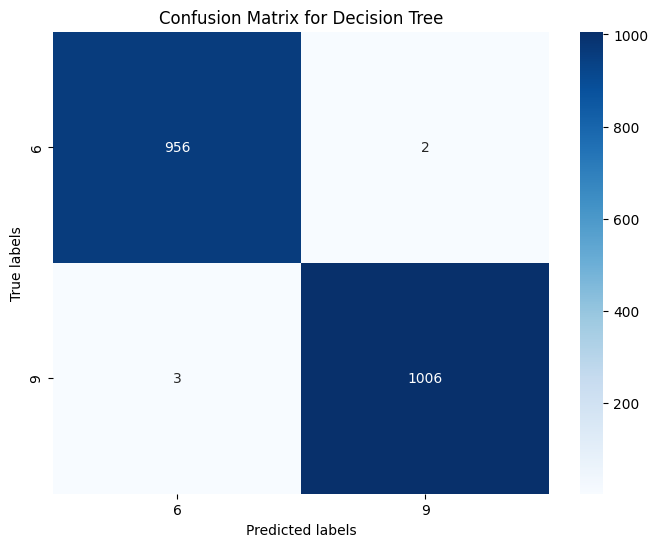

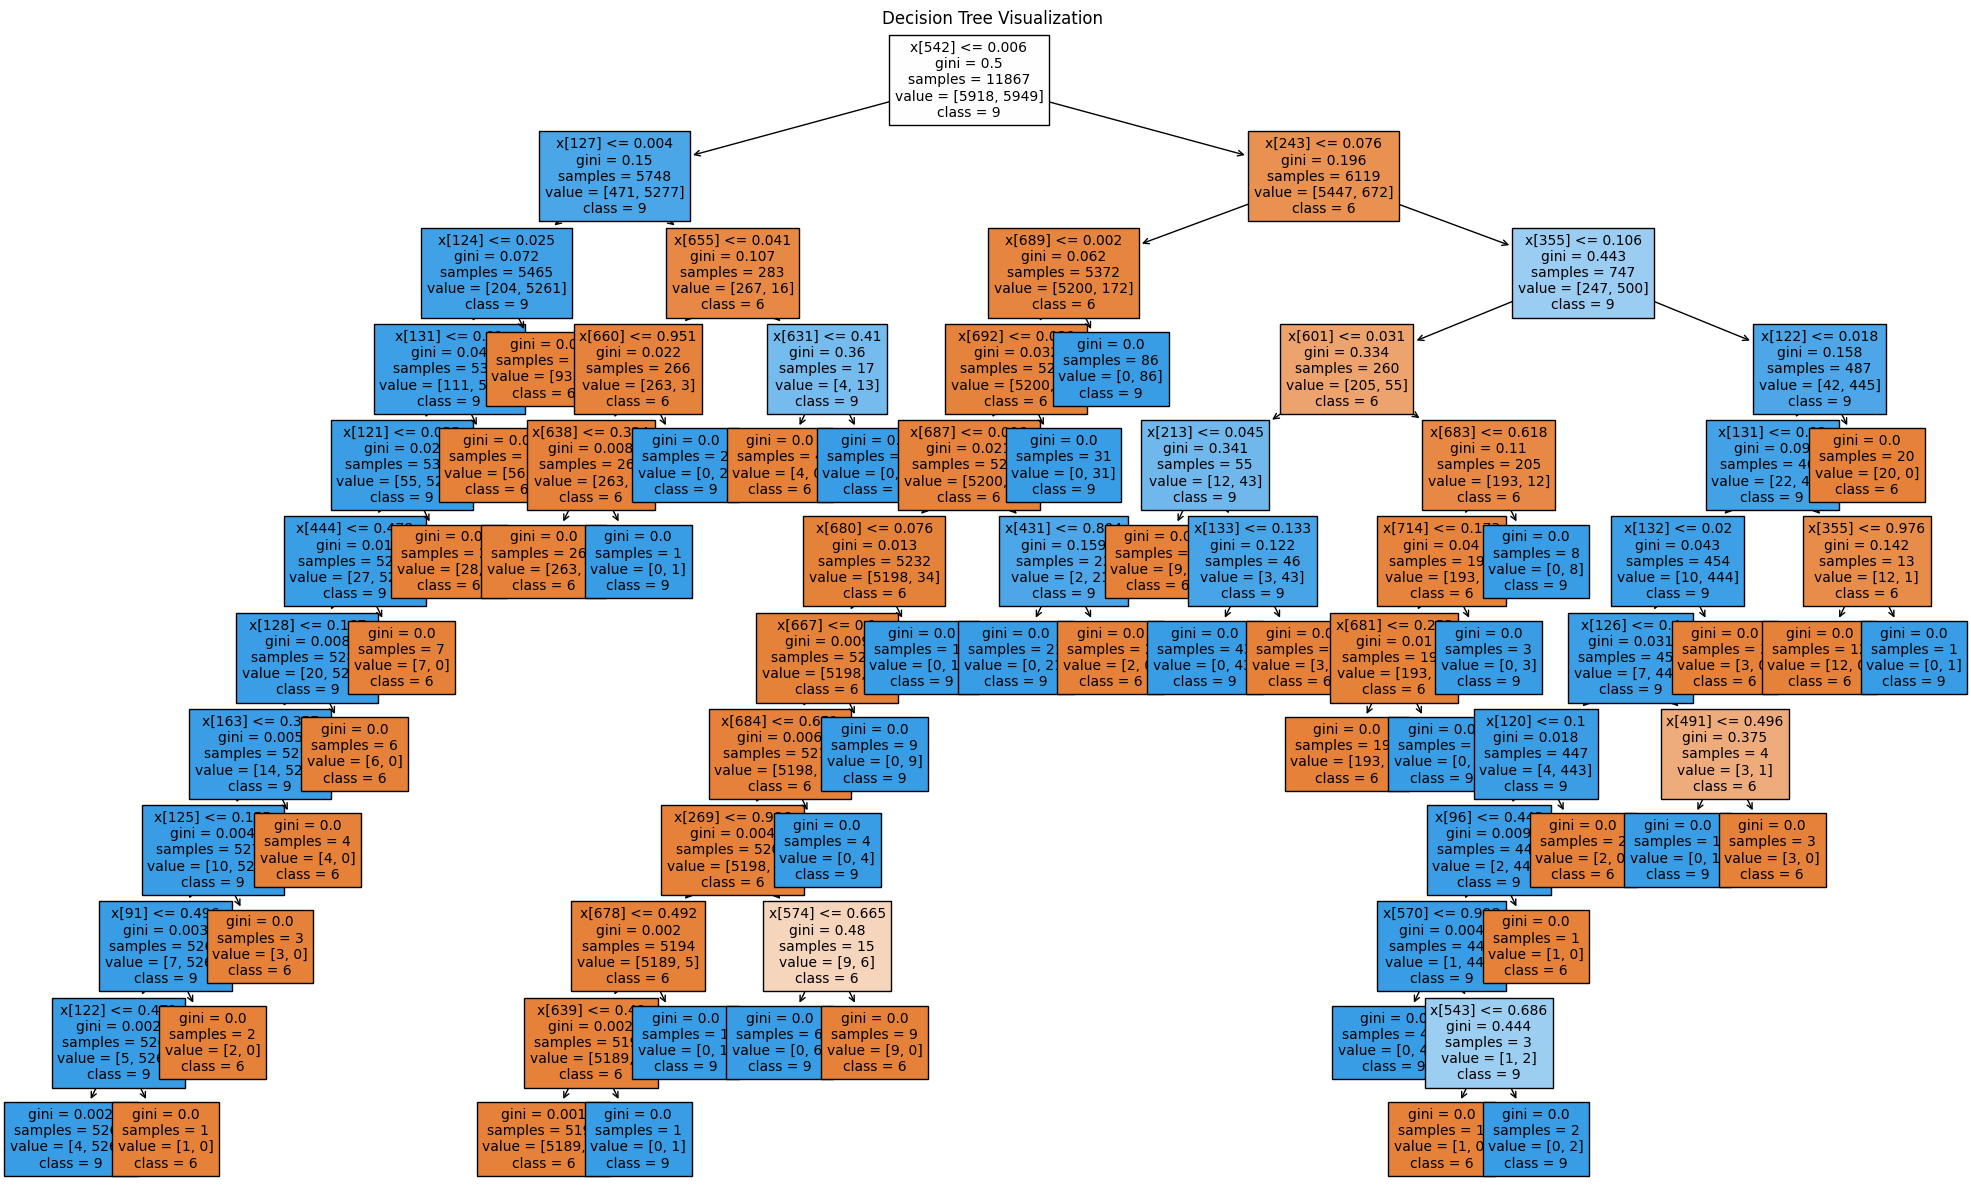

In [7]:
# Start timing
start_time = time.time()
# Load the MNIST data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Flatten the training and test images
n_samples_train = train_X.shape[0]
n_samples_test = test_X.shape[0]
train_X_flat = train_X.reshape((n_samples_train, -1)) / 255.0  # Normalize the training data
test_X_flat = test_X.reshape((n_samples_test, -1)) / 255.0    # Normalize the test data

# Filter out the samples for digits 6 and 9
X69_train = train_X_flat[(train_y == 6) | (train_y == 9)]
y69_train = train_y[(train_y == 6) | (train_y == 9)]
X69_test = test_X_flat[(test_y == 6) | (test_y == 9)]
y69_test = test_y[(test_y == 6) | (test_y == 9)]

# Set up cross-validation method
cv_method = RepeatedKFold(n_splits=10, n_repeats=3, random_state=6500)

# Define the parameter grid to search over for the Decision Tree
param_grid = {'max_depth': range(1, 20)}

# Initialize the GridSearchCV object
tree_search = GridSearchCV(
    DecisionTreeClassifier(random_state=6500),
    param_grid,
    cv=cv_method,  
    n_jobs=-1,
    verbose=True
)

# Perform the grid search to find the optimal tree depth
tree_search.fit(X69_train, y69_train)

# Extract the best parameter (tree depth) and best cross-validation score
best_depth = tree_search.best_params_['max_depth']
best_score = tree_search.best_score_

# Fit the Decision Tree classifier with the optimal depth found
dtc = DecisionTreeClassifier(max_depth=best_depth, random_state=6500)
dtc.fit(X69_train, y69_train)

# Find the optimal value for ccp_alpha
path = dtc.cost_complexity_pruning_path(X69_train, y69_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Initialize an array to store the results
dtc_results = []

# Iterate over the alphas and evaluate the trees
for ccp_alpha in ccp_alphas:
    dtc_alpha = DecisionTreeClassifier(random_state=6500, ccp_alpha=ccp_alpha)
    dtc_alpha.fit(X69_train, y69_train)
    train_score = dtc_alpha.score(X69_train, y69_train)
    test_score = dtc_alpha.score(X69_test, y69_test)
    dtc_results.append({
        "ccp_alpha": ccp_alpha,
        "train_score": train_score,
        "test_score": test_score
    })

# Convert the results to a DataFrame
dtc_results_df = pd.DataFrame(dtc_results)

# Find the alpha value with the best test score
best_alpha_row = dtc_results_df.loc[dtc_results_df['test_score'].idxmax()]
best_ccp_alpha = best_alpha_row['ccp_alpha']
best_test_score = best_alpha_row['test_score']

# Optional: Fit the model with the best alpha value
best_dtc = DecisionTreeClassifier(random_state=6500, ccp_alpha=best_ccp_alpha)
best_dtc.fit(X69_train, y69_train)

# Evaluate the classifier with the best alpha value
train_score_best = best_dtc.score(X69_train, y69_train)
test_score_best = best_dtc.score(X69_test, y69_test)

# Predict on the test set using the best decision tree model
y_pred = best_dtc.predict(X69_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y69_test, y_pred)

# End timing
end_time = time.time()
total_time = end_time - start_time
hours, remainder = divmod(total_time, 3600)
minutes, seconds = divmod(remainder, 60)
formatted_time = f"{int(hours):02d}:{int(minutes):02d}:{int(seconds):02d}"

# Store the results in a DataFrame
decision_tree_results_data = {
    'Model': 'Decision Tree',
    'Train Accuracy': train_score_best,
    'CV Accuracy': best_score,
    'Test Accuracy': test_score_best,
    'Time H-M-S': formatted_time
}

# Convert the results to a DataFrame and then concatenate it
decision_tree_results_df = pd.DataFrame([decision_tree_results_data])
Results69 = pd.concat([Results69, decision_tree_results_df], ignore_index=True)

# Print the results DataFrame
print(f"Optimal tree depth: {best_depth}")
print(f"Best ccp_alpha: {best_ccp_alpha}")
print(Results69)

# Create a heatmap using seaborn to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=['6', '9'], yticklabels=['6', '9'])

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Graph the decision tree
plt.figure(figsize=(25, 15))
plot_tree(dtc, filled=True, class_names=['6', '9'], fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

<div style="display: flex; align-items: center; height: 100px; border: 5px solid #000080; background-color: #ADD8E6; padding: 10px;">
    <h3 style="color: #000080; margin: 0; font-size: 38px;">1.4) Run Linear SVC with optimal cost parameter selected via cross validation</h3>
</div>

$$ C^* = \underset{C \in \{C_1, C_2, \ldots, C_n\}}{\mathrm{argmax}} \; \text{CV-Metric}(C)


Fitting 1 folds for each of 5 candidates, totalling 5 fits
Best C: 0.1
           Model  Train Accuracy  CV Accuracy  Test Accuracy Time H-M-S
0            KNN        1.000000     0.999410       0.999492   00:00:14
1       Logistic        0.999916     0.998483       0.996441   00:00:01
2  Decision Tree        0.998567     0.994775       0.997458   00:01:39
3     Linear SVC        0.999663     0.995366       0.996950   00:00:02


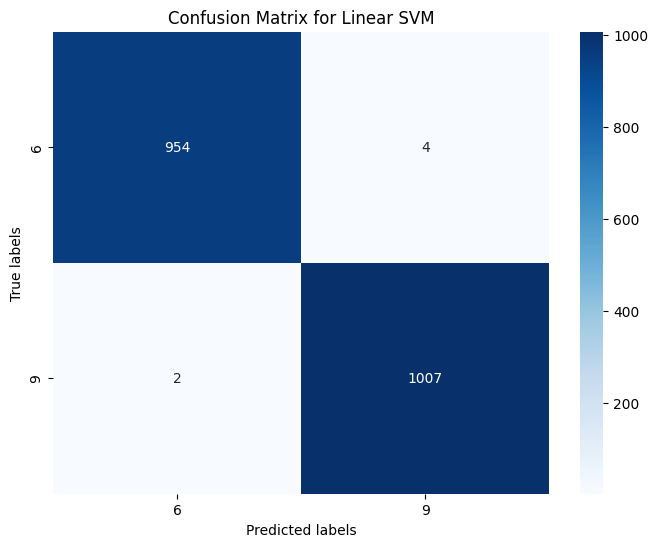

In [8]:
# Start timing
start_time = time.time()
# Load the MNIST data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Flatten the training and test images
n_samples_train = train_X.shape[0]
n_samples_test = test_X.shape[0]
train_X_flat = train_X.reshape((n_samples_train, -1)) / 255.0  # Normalize the training data
test_X_flat = test_X.reshape((n_samples_test, -1)) / 255.0    # Normalize the test data

# Filter out the samples for digits 6 and 9
X69_train = train_X_flat[(train_y == 6) | (train_y == 9)]
y69_train = train_y[(train_y == 6) | (train_y == 9)]
X69_test = test_X_flat[(test_y == 6) | (test_y == 9)]
y69_test = test_y[(test_y == 6) | (test_y == 9)]

param_grid = {'C': [0.1, 1, 10, 100, 1000]}

# Initialize and train the Linear SVM model
cv = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
svm_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=cv, n_jobs=-1, verbose=1)
svm_search.fit(X69_train, y69_train)

# Extract the best score and the best parameter (C)
best_C = svm_search.best_params_['C']
best_score = svm_search.best_score_

# Fit the Linear SVM classifier with the optimal C found
svm = SVC(kernel='linear', C=best_C)
svm.fit(X69_train, y69_train)

# Evaluate the model on the training data
train_accuracy = svm.score(X69_train, y69_train)

# Evaluate the model on the test data
test_accuracy = svm.score(X69_test, y69_test)

# End timing
end_time = time.time()
total_time = end_time - start_time
hours, remainder = divmod(total_time, 3600)
minutes, seconds = divmod(remainder, 60)
formatted_time = f"{int(hours):02d}:{int(minutes):02d}:{int(seconds):02d}"

# Store the results in a DataFrame
linear_svm_results_data = {
    'Model': 'Linear SVC',
    'Train Accuracy': train_accuracy,
    'CV Accuracy': best_score,  # The best score from cross-validation
    'Test Accuracy': test_accuracy,
    'Time H-M-S': formatted_time
}

# Convert the results to a DataFrame and then concatenate it
linear_svm_results_df = pd.DataFrame([linear_svm_results_data])
Results69 = pd.concat([Results69, linear_svm_results_df], ignore_index=True)

# Print the best C value
print(f"Best C: {best_C}")
# Print the results DataFrame
print(Results69)

# Predict on the test set
y_pred = svm.predict(X69_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y69_test, y_pred)

# Create a heatmap using seaborn to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['6', '9'], yticklabels=['6', '9'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Linear SVM')
plt.show()

<div style="display: flex; align-items: center; height: 100px; border: 5px solid #000080; background-color: #ADD8E6; padding: 10px;">
    <h3 style="color: #000080; margin: 0; font-size: 38px;">1.5) Run Gaussian RBF kernel SVC with optimal gamma and cost parameter selected via cross validation</h3>
</div>

$$ (C^*, \gamma^*) = \underset{C, \gamma}{\mathrm{argmax}} \; \text{CV-Metric}(C, \gamma)

The RBF kernel function is defined as:

$$
K(x, x') = \exp\left(-\gamma \|x - x'\|^2\right)
$$

where:
- $K$ is the kernel function.
- $x$ and $x'$ are two samples.
- $\gamma$ (gamma) is a parameter that defines how much influence a single training example has.


<div style="border-left: 5px solid #5DADE2; padding: 15px; background-color: #EAF2F8; font-family: Arial, sans-serif;">



<ul style="list-style-type: none; padding-left: 0; color: #34495E;">
    <li style="margin-bottom: 10px;">• <b>Note:</b> Used Random search with drastically reduced folds and iterations here because GridSearch was computationally exhaustive due to this model only being able to use a single CPU core. I manually ran the search and got the values then plugged them in instead of feeding it back into the model automatically.</li>
   
</ul>

           Model  Train Accuracy  CV Accuracy  Test Accuracy Time H-M-S
0            KNN        1.000000     0.999410       0.999492   00:00:14
1       Logistic        0.999916     0.998483       0.996441   00:00:01
2  Decision Tree        0.998567     0.994775       0.997458   00:01:39
3     Linear SVC        0.999663     0.995366       0.996950   00:00:02
4        RBF SVC        0.975984     0.974720       0.975597   00:00:01
Optimal gamma for RBFSampler: 0.030088373338241544
Optimal alpha for SGDClassifier: 0.019461750585071408
Number of components for RBFSampler: 500
Maximum iterations for SGDClassifier: 1000
Tolerance for stopping criteria for SGDClassifier: 0.001


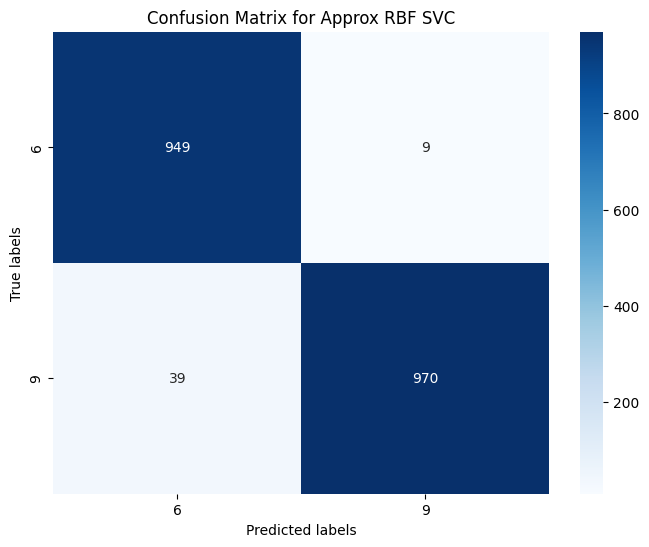

In [9]:
# Start timing
start_time = time.time()
# Load the MNIST data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Flatten the training and test images
n_samples_train = train_X.shape[0]
n_samples_test = test_X.shape[0]
train_X_flat = train_X.reshape((n_samples_train, -1)) / 255.0  # Normalize the training data
test_X_flat = test_X.reshape((n_samples_test, -1)) / 255.0    # Normalize the test data

# Filter out the samples for digits 6 and 9
X69_train = train_X_flat[(train_y == 6) | (train_y == 9)]
y69_train = train_y[(train_y == 6) | (train_y == 9)]
X69_test = test_X_flat[(test_y == 6) | (test_y == 9)]
y69_test = test_y[(test_y == 6) | (test_y == 9)]

# Set the parameters for the RBF sampler and SGDClassifier
rbf_feature = RBFSampler(gamma=0.030088373338241544, random_state=6500, n_components=500)
sgd_clf = SGDClassifier(alpha=0.019461750585071408, max_iter=1000, tol=1e-3, random_state=6500)

# Make a pipeline
rbf_svm_clf = make_pipeline(rbf_feature, sgd_clf)

# Fit the model
rbf_svm_clf.fit(X69_train, y69_train)

# Evaluate the model on the training data
train_accuracy_approx = rbf_svm_clf.score(X69_train, y69_train)

cv_scores = cross_val_score(rbf_svm_clf, X69_train, y69_train, cv=5)
cv_accuracy_approx = cv_scores.mean()

# Evaluate the model on the test data
test_accuracy_approx = rbf_svm_clf.score(X69_test, y69_test)

# End timing
end_time = time.time()
total_time_rbf = end_time - start_time
hours_rbf, remainder_rbf = divmod(total_time_rbf, 3600)
minutes_rbf, seconds_rbf = divmod(remainder_rbf, 60)
formatted_time_rbf = f"{int(hours_rbf):02d}:{int(minutes_rbf):02d}:{int(seconds_rbf):02d}"

# Store the results in a DataFrame
# Update the results dictionary with the CV accuracy
rbf_svc_results_data = {
    'Model': 'RBF SVC',
    'Train Accuracy': train_accuracy_approx,
    'CV Accuracy': cv_accuracy_approx,
    'Test Accuracy': test_accuracy_approx,
    'Time H-M-S': formatted_time_rbf
}

# Convert the results to a DataFrame and then concatenate it
rbf_svc_results_df = pd.DataFrame([rbf_svc_results_data])
Results69 = pd.concat([Results69, rbf_svc_results_df], ignore_index=True)

# Print the results DataFrame
print(Results69)

# Predict on the test set
y_pred_rbf = rbf_svm_clf.predict(X69_test)

# Set the parameters for the RBF sampler and SGDClassifier
gamma_value = 0.030088373338241544
alpha_value = 0.019461750585071408
n_components_value = 500
max_iter_value = 1000
tol_value = 1e-3

rbf_feature = RBFSampler(gamma=gamma_value, random_state=6500, n_components=n_components_value)
sgd_clf = SGDClassifier(alpha=alpha_value, max_iter=max_iter_value, tol=tol_value, random_state=6500)

# Print the optimal hyperparameters
print(f"Optimal gamma for RBFSampler: {gamma_value}")
print(f"Optimal alpha for SGDClassifier: {alpha_value}")
print(f"Number of components for RBFSampler: {n_components_value}")
print(f"Maximum iterations for SGDClassifier: {max_iter_value}")
print(f"Tolerance for stopping criteria for SGDClassifier: {tol_value}")

# Compute the confusion matrix
conf_matrix_rbf = confusion_matrix(y69_test, y_pred_rbf)

# Create a heatmap using seaborn to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rbf, annot=True, fmt='g', cmap='Blues', xticklabels=['6', '9'], yticklabels=['6', '9'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Approx RBF SVC')
plt.show()

<div style="border: 5px solid #5DADE2; background-color: #EAF2F8; padding: 40px; font-family: 'Arial', sans-serif;">
    <h2 style="color: #34495E; font-size: 48px; margin: 0;">2) Consider the binary classification of 1 vs 7</h2>
</div>

<div style="display: flex; align-items: center; height: 100px; border: 5px solid #000080; background-color: #ADD8E6; padding: 10px;">
    <h3 style="color: #000080; margin: 0; font-size: 38px;">2.1) Run KNN with optimal K selected via cross validation</h3>
</div>


The optimal hyperparameter \( k \) for the k-Nearest Neighbors algorithm is determined through a grid search, aiming to maximize cross-validation accuracy. This is formulated as the following optimization problem:

$$
\begin{aligned}
k^* = \underset{k \in \{1, 3, 5, 7, 9\}}{\mathrm{argmax}} \; \text{CV-Accuracy}(k)
\end{aligned}
$$

Once the best \( k \) is found, the k-Nearest Neighbors algorithm predicts the class of a sample based on the majority vote among its \( k \) nearest neighbors:

$$
\begin{aligned}
y_i = \mathrm{mode}\{ y_{i1}, y_{i2}, \ldots, y_{ik} \}
\end{aligned}
$$

where \( y_i \) is the predicted class for the \( i \)-th test sample, and \( y_{i1}, y_{i2}, \ldots, y_{ik} \) are the classes of the \( k \) nearest training samples to the \( i \)-th test sample.

The performance of the classifier is often summarized using a confusion matrix, which for a binary classification into classes \( 6 \) and \( 9 \), can be represented as:

$$
\begin{aligned}
C = \begin{bmatrix}
\text{True Positives for 6} & \text{False Positives for 9} \\
\text{False Negatives for 6} & \text{True Positives for 9}
\end{bmatrix}
\end{aligned}
$$






  Model  Train Accuracy  CV Accuracy  Test Accuracy Time H-M-S
0   KNN             1.0     0.994644       0.992603   00:00:11


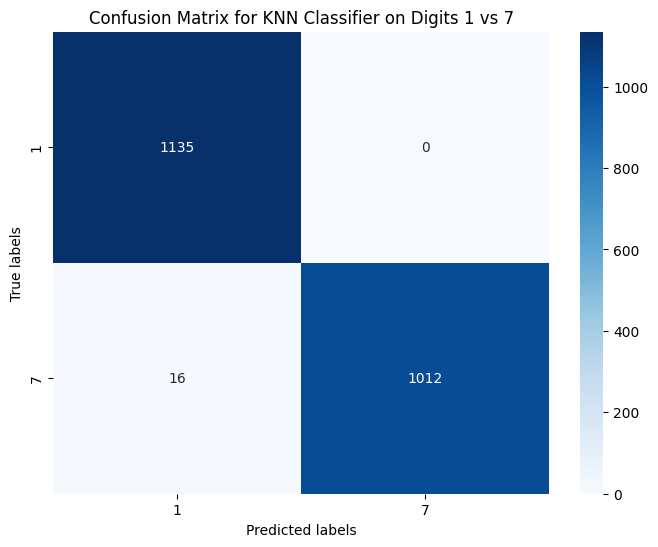

In [10]:
# Load the MNIST data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Start timing
start_time = time.time()

# Flatten the training and test images
n_samples_train = train_X.shape[0]
n_samples_test = test_X.shape[0]
train_X_flat = train_X.reshape((n_samples_train, -1)) / 255.0  # Normalize the training data
test_X_flat = test_X.reshape((n_samples_test, -1)) / 255.0    # Normalize the test data

# Filter out the samples for digits 1 and 7
X17_train = train_X_flat[(train_y == 1) | (train_y == 7)]
y17_train = train_y[(train_y == 1) | (train_y == 7)]
X17_test = test_X_flat[(test_y == 1) | (test_y == 7)]
y17_test = test_y[(test_y == 1) | (test_y == 7)]

# Set up cross-validation method
cv_method = RepeatedKFold(n_splits=10, n_repeats=3, random_state=6500)

# Define the parameter grid to search over
search_grid = {'n_neighbors': [1, 3, 5, 7, 9]}

# Set up the grid search with cross-validation
search = GridSearchCV(KNeighborsClassifier(), search_grid, cv=cv_method, n_jobs=-1, verbose=False)

# Perform the grid search to find the optimal k
search.fit(X17_train, y17_train)

# Extract the best score and the best parameter (k)
best_k = search.best_params_['n_neighbors']
cv_accuracy = search.best_score_

# Fit the kNN classifier with the optimal k found
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X17_train, y17_train)

# Evaluate the classifier
train_accuracy = knn.score(X17_train, y17_train)
test_accuracy = knn.score(X17_test, y17_test)

# End timing
end_time = time.time()
total_time = end_time - start_time

# Convert total time from seconds to hours, minutes, seconds
hours, remainder = divmod(total_time, 3600)
minutes, seconds = divmod(remainder, 60)
time_formatted = "{:02d}:{:02d}:{:02d}".format(int(hours), int(minutes), int(seconds))

# Store the results in a DataFrame
results_data = {
    'Model': ['KNN'],
    'Train Accuracy': [train_accuracy],
    'CV Accuracy': [cv_accuracy],
    'Test Accuracy': [test_accuracy],
    'Time H-M-S': [time_formatted]  
}

# Assuming there is an existing DataFrame to store results for 1 vs 7 classification
Results17 = pd.DataFrame(results_data)

# Print the results DataFrame
print(Results17)

y_pred = knn.predict(X17_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y17_test, y_pred)

# Create a heatmap using seaborn to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['1', '7'], yticklabels=['1', '7'])

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for KNN Classifier on Digits 1 vs 7')
plt.show()


<div style="display: flex; align-items: center; height: 100px; border: 5px solid #000080; background-color: #ADD8E6; padding: 10px;">
    <h3 style="color: #000080; margin: 0; font-size: 38px;">2.2) Run Logistic Regression</h3>
</div>


The logistic regression model predicts the probability that a sample \( \mathbf{x} \) belongs to class \( y=1 \) (e.g., digit '9') using the logistic function:
$$
\begin{aligned}
P(y=1|\mathbf{x};\theta) &= \frac{1}{1 + e^{-\theta^\top \mathbf{x}}}
\end{aligned}
$$

The parameters \( \theta \) of the model are estimated by maximizing the likelihood of the observed data. Cross-validation is performed to evaluate the model's performance, which can be represented as:
$$
\begin{aligned}
\text{CV-Accuracy} &= \frac{1}{k}\sum_{i=1}^{k} \text{Accuracy}_{CV_i}
\end{aligned}
$$

where \( k \) is the number of cross-validation folds and \( \text{Accuracy}_{CV_i} \) is the accuracy score for the \( i \)-th fold.

After fitting the model to the training data, its predictive performance is assessed using a confusion matrix on the test data:
$$
\begin{aligned}
C &= \begin{bmatrix}
\text{True Positives} & \text{False Positives} \\
\text{False Negatives} & \text{True Positives}
\end{bmatrix}
\end{aligned}
$$

This matrix is visualized with a heatmap to better interpret the classifier's performance.


                 Model  Train Accuracy  CV Accuracy  Test Accuracy Time H-M-S
0                  KNN        1.000000     0.994644       0.992603   00:00:11
1  Logistic Regression        0.998309     0.995771       0.994914   00:00:01


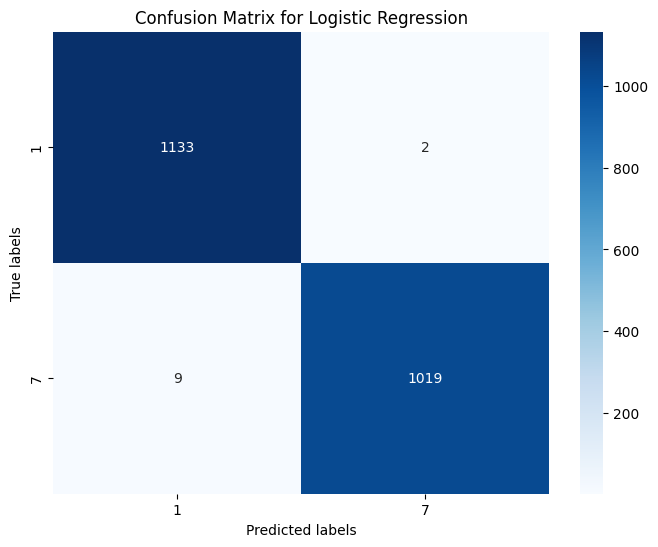

In [11]:
# Start timing
start_time = time.time()

# Load the MNIST data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Flatten the training and test images
n_samples_train = train_X.shape[0]
n_samples_test = test_X.shape[0]
train_X_flat = train_X.reshape((n_samples_train, -1)) / 255.0  # Normalize the training data
test_X_flat = test_X.reshape((n_samples_test, -1)) / 255.0    # Normalize the test data

# Filter out the samples for digits 1 and 7
X17_train = train_X_flat[(train_y == 1) | (train_y == 7)]
y17_train = train_y[(train_y == 1) | (train_y == 7)]
X17_test = test_X_flat[(test_y == 1) | (test_y == 7)]
y17_test = test_y[(test_y == 1) | (test_y == 7)]

# Initialize and train the logistic regression model
lr = LogisticRegression(solver='liblinear')

# Perform cross-validation and calculate the average CV accuracy
cv_scores = cross_val_score(lr, X17_train, y17_train, cv=5)
cv_accuracy = np.mean(cv_scores)

# Fit the logistic regression model with the whole training dataset
lr.fit(X17_train, y17_train)

# Evaluate the model on the training data
train_accuracy = lr.score(X17_train, y17_train)

# Evaluate the model on the test data
test_accuracy = lr.score(X17_test, y17_test)

# End timing
end_time = time.time()
total_time = end_time - start_time
hours, remainder = divmod(total_time, 3600)
minutes, seconds = divmod(remainder, 60)
formatted_time = f"{int(hours):02d}:{int(minutes):02d}:{int(seconds):02d}"

# Store the results in a DataFrame
logistic_results_data = {
    'Model': 'Logistic Regression',
    'Train Accuracy': train_accuracy,
    'CV Accuracy': cv_accuracy,
    'Test Accuracy': test_accuracy,
    'Time H-M-S': formatted_time
}

# Assuming Results17 is previously defined and is a pandas DataFrame
logistic_results_df = pd.DataFrame([logistic_results_data])
Results17 = pd.concat([Results17, logistic_results_df], ignore_index=True)

# Print the results DataFrame
print(Results17)

y_pred = lr.predict(X17_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y17_test, y_pred)

# Create a heatmap using seaborn to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['1', '7'], yticklabels=['1', '7'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


<div style="display: flex; align-items: center; height: 100px; border: 5px solid #000080; background-color: #ADD8E6; padding: 10px;">
    <h3 style="color: #000080; margin: 0; font-size: 38px;">2.3) Run decision tree with optimal depth selected via cross validation</h3>
</div>


\begin{align*}
& \text{Let } X \text{ be the feature matrix, } y \text{ be the target vector.} \\
& \text{Divide } X \text{ and } y \text{ into } k \text{ folds.} \\
& \text{For each depth } d \in \{1, 2, \ldots, D\}: \\
& \quad \text{For each fold } i \in \{1, 2, \ldots, k\}: \\
& \quad \quad \text{Train on } X \setminus X_i, y \setminus y_i. \\
& \quad \quad \text{Validate on } X_i, y_i. \\
& \quad \text{Compute average performance across all folds.} \\
& \text{Select } d^* \text{ with the best performance.} \\
& \text{Train decision tree on } X, y \text{ using depth } d^*. \\
\end{align*}

Fitting 5 folds for each of 19 candidates, totalling 95 fits
Optimal tree depth: 13
                 Model  Train Accuracy  CV Accuracy  Test Accuracy Time H-M-S
0                  KNN        1.000000     0.994644       0.992603   00:00:11
1  Logistic Regression        0.998309     0.995771       0.994914   00:00:01
2        Decision Tree        0.998693     0.989621       0.989829   00:00:08


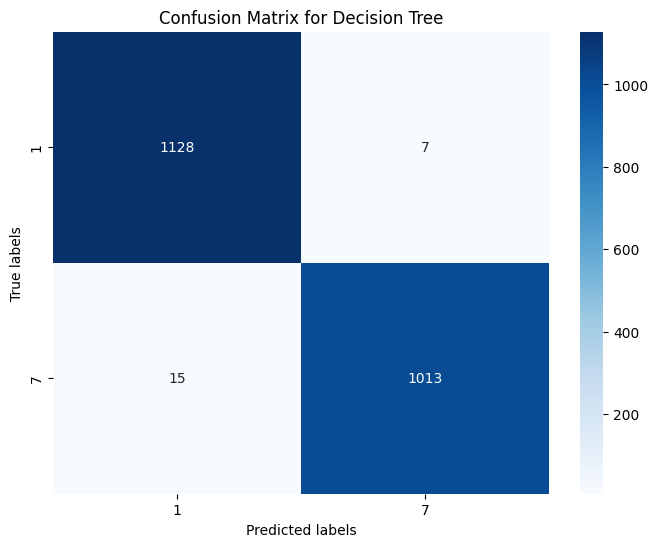

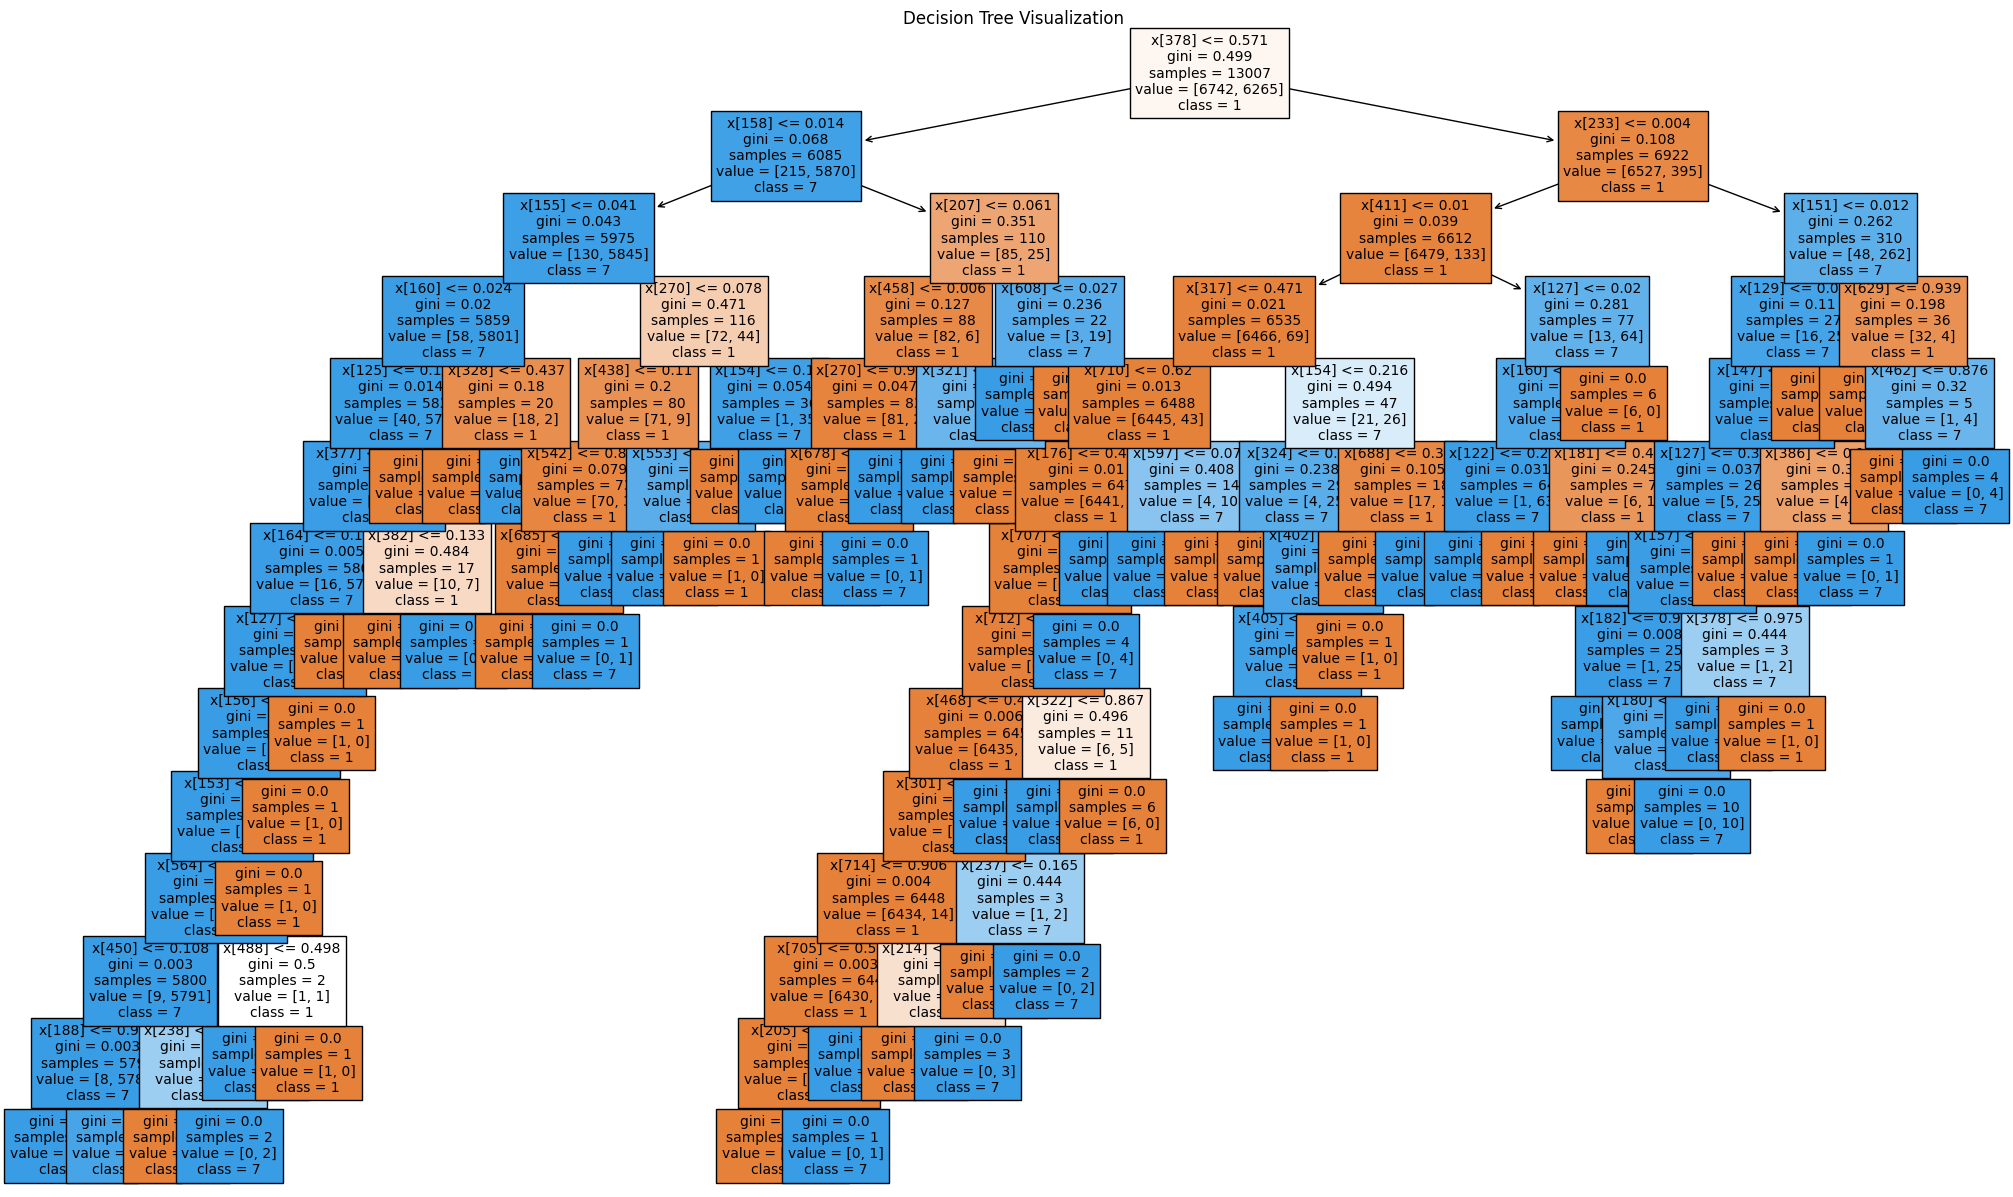

In [12]:
# Start timing
start_time = time.time()

# Load the MNIST data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Flatten the training and test images
n_samples_train = train_X.shape[0]
n_samples_test = test_X.shape[0]
train_X_flat = train_X.reshape((n_samples_train, -1)) / 255.0  # Normalize the training data
test_X_flat = test_X.reshape((n_samples_test, -1)) / 255.0    # Normalize the test data

# Filter out the samples for digits 1 and 7
X17_train = train_X_flat[(train_y == 1) | (train_y == 7)]
y17_train = train_y[(train_y == 1) | (train_y == 7)]
X17_test = test_X_flat[(test_y == 1) | (test_y == 7)]
y17_test = test_y[(test_y == 1) | (test_y == 7)]

# Define the parameter grid to search over for the Decision Tree
param_grid = {'max_depth': range(1, 20)}

# Initialize the GridSearchCV object
tree_search = GridSearchCV(
    DecisionTreeClassifier(random_state=6500),
    param_grid,
    cv=5,  # Adjusted to 5-fold cross-validation
    n_jobs=-1,
    verbose=True
)

# Perform the grid search to find the optimal tree depth
tree_search.fit(X17_train, y17_train)

# Extract the best parameter (tree depth) and best cross-validation score
best_depth = tree_search.best_params_['max_depth']
best_score = tree_search.best_score_

# Fit the Decision Tree classifier with the optimal depth found
dtc = DecisionTreeClassifier(max_depth=best_depth, random_state=6500)
dtc.fit(X17_train, y17_train)

# Evaluate the classifier
train_accuracy = dtc.score(X17_train, y17_train)
test_accuracy = dtc.score(X17_test, y17_test)

# End timing
end_time = time.time()
total_time = end_time - start_time
hours, remainder = divmod(total_time, 3600)
minutes, seconds = divmod(remainder, 60)
formatted_time = f"{int(hours):02d}:{int(minutes):02d}:{int(seconds):02d}"

# Store the results in a DataFrame
decision_tree_results_data = {
    'Model': 'Decision Tree',
    'Train Accuracy': train_accuracy,
    'CV Accuracy': best_score,
    'Test Accuracy': test_accuracy,
    'Time H-M-S': formatted_time
}

# Assuming Results17 is previously defined and is a pandas DataFrame
decision_tree_results_df = pd.DataFrame([decision_tree_results_data])
Results17 = pd.concat([Results17, decision_tree_results_df], ignore_index=True)

# Print the results DataFrame
print(f"Optimal tree depth: {best_depth}")
print(Results17)

# Predict on the test set using the decision tree model
y_pred = dtc.predict(X17_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y17_test, y_pred)

# Create a heatmap using seaborn to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=['1', '7'], yticklabels=['1', '7'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Graph the decision tree
plt.figure(figsize=(25, 15))
plot_tree(dtc, filled=True, class_names=['1', '7'], fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()


<div style="display: flex; align-items: center; height: 100px; border: 5px solid #000080; background-color: #ADD8E6; padding: 10px;">
    <h3 style="color: #000080; margin: 0; font-size: 38px;">2.4) Run Linear SVC with optimal cost parameter selected via cross validation</h3>
</div>


$$ C^* = \underset{C \in \{C_1, C_2, \ldots, C_n\}}{\mathrm{argmax}} \; \text{CV-Metric}(C)

Fitting 1 folds for each of 5 candidates, totalling 5 fits
Best C: 1
                 Model  Train Accuracy  CV Accuracy  Test Accuracy Time H-M-S
0                  KNN        1.000000     0.994644       0.992603   00:00:11
1  Logistic Regression        0.998309     0.995771       0.994914   00:00:01
2        Decision Tree        0.998693     0.989621       0.989829   00:00:08
3           Linear SVC        0.999539     0.995772       0.992141   00:00:03


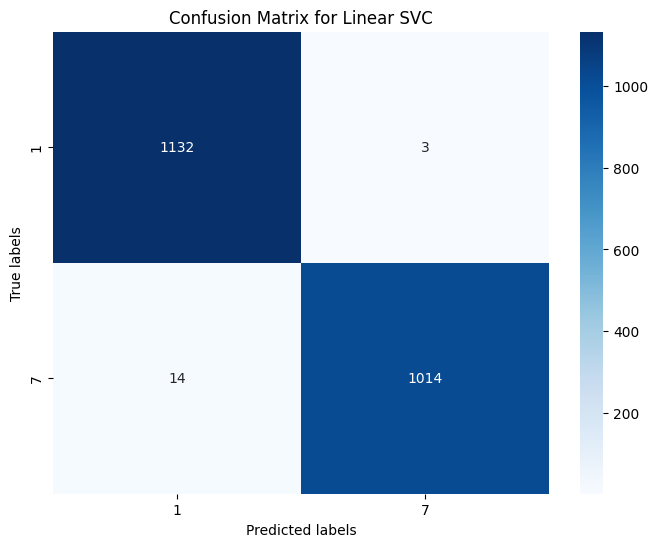

In [13]:
# Start timing
start_time = time.time()

# Load the MNIST data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Flatten the training and test images
n_samples_train = train_X.shape[0]
n_samples_test = test_X.shape[0]
train_X_flat = train_X.reshape((n_samples_train, -1)) / 255.0  # Normalize the training data
test_X_flat = test_X.reshape((n_samples_test, -1)) / 255.0    # Normalize the test data

# Filter out the samples for digits 1 and 7
X17_train = train_X_flat[(train_y == 1) | (train_y == 7)]
y17_train = train_y[(train_y == 1) | (train_y == 7)]
X17_test = test_X_flat[(test_y == 1) | (test_y == 7)]
y17_test = test_y[(test_y == 1) | (test_y == 7)]

param_grid = {'C': [0.1, 1, 10, 100, 1000]}

# Initialize and train the Linear SVM model
cv = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
svm_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=cv, n_jobs=-1, verbose=1)
svm_search.fit(X17_train, y17_train)

# Extract the best score and the best parameter (C)
best_C = svm_search.best_params_['C']
best_score = svm_search.best_score_

# Fit the Linear SVM classifier with the optimal C found
svm = SVC(kernel='linear', C=best_C)
svm.fit(X17_train, y17_train)

# Evaluate the model on the training data
train_accuracy = svm.score(X17_train, y17_train)

# Evaluate the model on the test data
test_accuracy = svm.score(X17_test, y17_test)

# Extract the best score and the best parameter (C)
best_C = svm_search.best_params_['C']
best_score = svm_search.best_score_  # CV accuracy score is obtained here

# End timing
end_time = time.time()
total_time = end_time - start_time
hours, remainder = divmod(total_time, 3600)
minutes, seconds = divmod(remainder, 60)
formatted_time = f"{int(hours):02d}:{int(minutes):02d}:{int(seconds):02d}"

# Store the results in a DataFrame
linear_svm_results_data = {
    'Model': 'Linear SVC',
    'Train Accuracy': train_accuracy,
    'CV Accuracy': best_score,
    'Test Accuracy': test_accuracy,
    'Time H-M-S': formatted_time
}

# Assuming Results17 is previously defined and is a pandas DataFrame
linear_svm_results_df = pd.DataFrame([linear_svm_results_data])
Results17 = pd.concat([Results17, linear_svm_results_df], ignore_index=True)

# Print the best C value and the results DataFrame
print(f"Best C: {best_C}")
print(Results17)

# Predict on the test set
y_pred = svm.predict(X17_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y17_test, y_pred)

# Create a heatmap using seaborn to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['1', '7'], yticklabels=['1', '7'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Linear SVC')
plt.show()


<div style="display: flex; align-items: center; height: 100px; border: 5px solid #000080; background-color: #ADD8E6; padding: 10px;">
    <h3 style="color: #000080; margin: 0; font-size: 38px;">2.5) Run Gaussian RBF kernel SVC with optimal gamma and cost parameter selected via cross validation</h3>
</div>


$$ (C^*, \gamma^*) = \underset{C, \gamma}{\mathrm{argmax}} \; \text{CV-Metric}(C, \gamma)

<div style="border-left: 5px solid #5DADE2; padding: 15px; background-color: #EAF2F8; font-family: Arial, sans-serif;">



<ul style="list-style-type: none; padding-left: 0; color: #34495E;">
    <li style="margin-bottom: 10px;">• <b>Note:</b> Used Random search with drastically reduced folds and iterations here because GridSearch was computationally exhaustive due to this model only being able to use a single CPU core. I manually ran the search and got the values then plugged them in instead of feeding it back into the model automatically.</li>
   
</ul>

Cross-validation Accuracy: 0.9968
                 Model  Train Accuracy  CV Accuracy  Test Accuracy Time H-M-S
0                  KNN        1.000000     0.994644       0.992603   00:00:11
1  Logistic Regression        0.998309     0.995771       0.994914   00:00:01
2        Decision Tree        0.998693     0.989621       0.989829   00:00:08
3           Linear SVC        0.999539     0.995772       0.992141   00:00:03
4              RBF SVC        0.999077     0.996771       0.997688   00:00:06


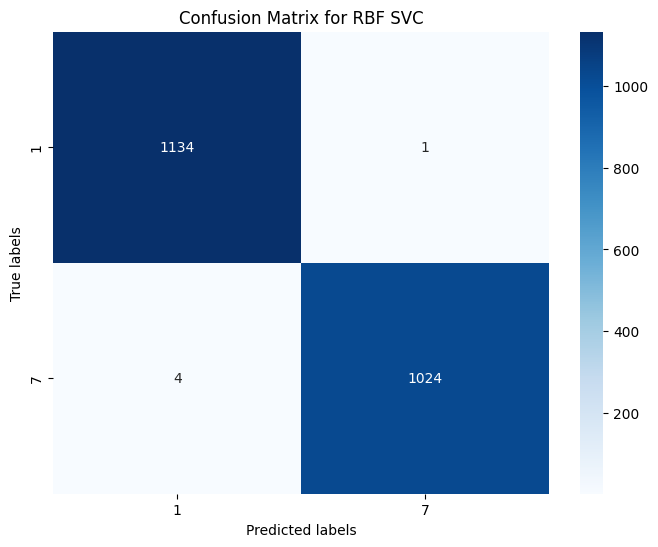

In [14]:
# Start timing
start_time = time.time()

# Load the MNIST data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Flatten the training and test images
n_samples_train = train_X.shape[0]
n_samples_test = test_X.shape[0]
train_X_flat = train_X.reshape((n_samples_train, -1)) / 255.0  # Normalize the training data
test_X_flat = test_X.reshape((n_samples_test, -1)) / 255.0    # Normalize the test data

# Filter out the samples for digits 1 and 7
X17_train = train_X_flat[(train_y == 1) | (train_y == 7)]
y17_train = train_y[(train_y == 1) | (train_y == 7)]
X17_test = test_X_flat[(test_y == 1) | (test_y == 7)]
y17_test = test_y[(test_y == 1) | (test_y == 7)]

# Initialize and train the Gaussian RBF kernel SVM model
svm = SVC(kernel='rbf', gamma=0.01, C=5)
svm.fit(X17_train, y17_train)

# Evaluate the model on the training data
train_accuracy = svm.score(X17_train, y17_train)

# Evaluate the model on the test data
test_accuracy = svm.score(X17_test, y17_test)

# Perform 5-fold cross-validation and store the results
cv_scores = cross_val_score(svm, X17_train, y17_train, cv=5)

# Calculate the average of the cross-validation scores
cv_accuracy = cv_scores.mean()

# Print the cross-validation accuracy
print(f"Cross-validation Accuracy: {cv_accuracy:.4f}")

# End timing
end_time = time.time()
total_time_rbf = end_time - start_time
hours_rbf, remainder_rbf = divmod(total_time_rbf, 3600)
minutes_rbf, seconds_rbf = divmod(remainder_rbf, 60)
formatted_time_rbf = f"{int(hours_rbf):02d}:{int(minutes_rbf):02d}:{int(seconds_rbf):02d}"

# Store the results in a DataFrame
rbf_svc_results_data = {
    'Model': 'RBF SVC',
    'Train Accuracy': train_accuracy,
    'CV Accuracy': cv_accuracy,  
    'Test Accuracy': test_accuracy,
    'Time H-M-S': formatted_time_rbf
}
# Convert the results to a DataFrame
rbf_svc_results_df = pd.DataFrame([rbf_svc_results_data])
# Concatenate the new results to the existing DataFrame
Results17 = pd.concat([Results17, rbf_svc_results_df], ignore_index=True)

# Print the updated results DataFrame
print(Results17)

# Predict on the test set
y_pred_rbf = svm.predict(X17_test)

# Compute the confusion matrix
conf_matrix_rbf = confusion_matrix(y17_test, y_pred_rbf)

# Create a heatmap using seaborn to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rbf, annot=True, fmt='g', cmap='Blues', xticklabels=['1', '7'], yticklabels=['1', '7'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for RBF SVC')
plt.show()


<div style="border: 5px solid #5DADE2; background-color: #EAF2F8; padding: 40px; font-family: 'Arial', sans-serif;">
    <h2 style="color: #34495E; font-size: 48px; margin: 0;">3) Consider the binary classification of 3 vs 5</h2>
</div>

<div style="display: flex; align-items: center; height: 100px; border: 5px solid #000080; background-color: #ADD8E6; padding: 10px;">
    <h3 style="color: #000080; margin: 0; font-size: 38px;">3.1) Run KNN with optimal K selected via cross validation</h3>
</div>


The optimal hyperparameter \( k \) for the k-Nearest Neighbors algorithm is determined through a grid search, aiming to maximize cross-validation accuracy. This is formulated as the following optimization problem:

$$
\begin{aligned}
k^* = \underset{k \in \{1, 3, 5, 7, 9\}}{\mathrm{argmax}} \; \text{CV-Accuracy}(k)
\end{aligned}
$$

Once the best \( k \) is found, the k-Nearest Neighbors algorithm predicts the class of a sample based on the majority vote among its \( k \) nearest neighbors:

$$
\begin{aligned}
y_i = \mathrm{mode}\{ y_{i1}, y_{i2}, \ldots, y_{ik} \}
\end{aligned}
$$

where \( y_i \) is the predicted class for the \( i \)-th test sample, and \( y_{i1}, y_{i2}, \ldots, y_{ik} \) are the classes of the \( k \) nearest training samples to the \( i \)-th test sample.

The performance of the classifier is often summarized using a confusion matrix, which for a binary classification into classes \( 6 \) and \( 9 \), can be represented as:

$$
\begin{aligned}
C = \begin{bmatrix}
\text{True Positives for 6} & \text{False Positives for 9} \\
\text{False Negatives for 6} & \text{True Positives for 9}
\end{bmatrix}
\end{aligned}
$$






Fitting 30 folds for each of 5 candidates, totalling 150 fits
  Model  Train Accuracy  CV Accuracy  Test Accuracy Time H-M-S
0   KNN        0.992815     0.988025        0.98633   00:00:08


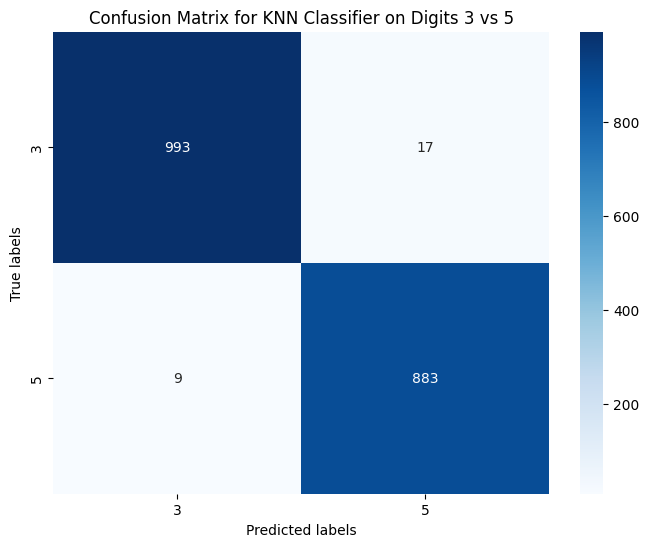

In [15]:
# Load the MNIST data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Start timing
start_time = time.time()

# Flatten the training and test images
n_samples_train = train_X.shape[0]
n_samples_test = test_X.shape[0]
train_X_flat = train_X.reshape((n_samples_train, -1)) / 255.0  # Normalize the training data
test_X_flat = test_X.reshape((n_samples_test, -1)) / 255.0    # Normalize the test data

# Filter out the samples for digits 3 and 5
X35_train = train_X_flat[(train_y == 3) | (train_y == 5)]
y35_train = train_y[(train_y == 3) | (train_y == 5)]
X35_test = test_X_flat[(test_y == 3) | (test_y == 5)]
y35_test = test_y[(test_y == 3) | (test_y == 5)]

# Convert labels to binary (0 for digit 3, 1 for digit 5)
y35_train = np.where(y35_train == 3, 0, 1)
y35_test = np.where(y35_test == 3, 0, 1)

# Set up cross-validation method
cv_method = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define the parameter grid to search over
search_grid = {'n_neighbors': [1, 3, 5, 7, 9]}

# Set up the grid search with cross-validation
search = GridSearchCV(KNeighborsClassifier(), search_grid, cv=cv_method, n_jobs=-1, verbose=1)

# Perform the grid search to find the optimal k
search.fit(X35_train, y35_train)

# Extract the best score and the best parameter (k)
best_k = search.best_params_['n_neighbors']
cv_accuracy = search.best_score_

# Fit the kNN classifier with the optimal k found
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X35_train, y35_train)

# Evaluate the classifier
train_accuracy = knn.score(X35_train, y35_train)
test_accuracy = knn.score(X35_test, y35_test)

# End timing
end_time = time.time()
total_time = end_time - start_time

# Convert total time from seconds to hours, minutes, seconds
hours, remainder = divmod(total_time, 3600)
minutes, seconds = divmod(remainder, 60)
time_formatted = "{:02d}:{:02d}:{:02d}".format(int(hours), int(minutes), int(seconds))

# Store the results in a DataFrame
results_data = {
    'Model': ['KNN'],
    'Train Accuracy': [train_accuracy],
    'CV Accuracy': [cv_accuracy],
    'Test Accuracy': [test_accuracy],
    'Time H-M-S': [time_formatted]
}

# Assuming there is an existing DataFrame to store results for 3 vs 5 classification
Results35 = pd.DataFrame(results_data)

# Print the results DataFrame
print(Results35)

y_pred = knn.predict(X35_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y35_test, y_pred)

# Create a heatmap using seaborn to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['3', '5'], yticklabels=['3', '5'])

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for KNN Classifier on Digits 3 vs 5')
plt.show()


<div style="display: flex; align-items: center; height: 100px; border: 5px solid #000080; background-color: #ADD8E6; padding: 10px;">
    <h3 style="color: #000080; margin: 0; font-size: 38px;">3.2) Run Logistic Regression</h3>
</div>


The logistic regression model predicts the probability that a sample \( \mathbf{x} \) belongs to class \( y=1 \) (e.g., digit '9') using the logistic function:
$$
\begin{aligned}
P(y=1|\mathbf{x};\theta) &= \frac{1}{1 + e^{-\theta^\top \mathbf{x}}}
\end{aligned}
$$

The parameters \( \theta \) of the model are estimated by maximizing the likelihood of the observed data. Cross-validation is performed to evaluate the model's performance, which can be represented as:
$$
\begin{aligned}
\text{CV-Accuracy} &= \frac{1}{k}\sum_{i=1}^{k} \text{Accuracy}_{CV_i}
\end{aligned}
$$

where \( k \) is the number of cross-validation folds and \( \text{Accuracy}_{CV_i} \) is the accuracy score for the \( i \)-th fold.

After fitting the model to the training data, its predictive performance is assessed using a confusion matrix on the test data:
$$
\begin{aligned}
C &= \begin{bmatrix}
\text{True Positives} & \text{False Positives} \\
\text{False Negatives} & \text{True Positives}
\end{bmatrix}
\end{aligned}
$$

This matrix is visualized with a heatmap to better interpret the classifier's performance.


                 Model  Train Accuracy  CV Accuracy  Test Accuracy Time H-M-S
0                  KNN        0.992815     0.988025       0.986330   00:00:08
1  Logistic Regression        0.971866     0.958622       0.966351   00:00:02


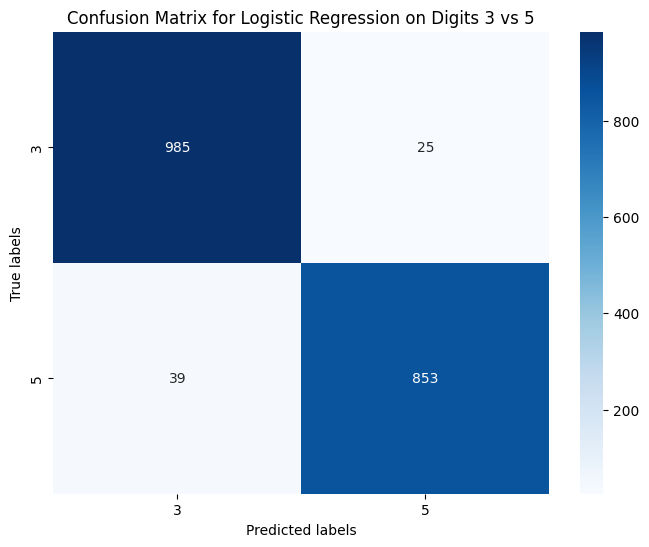

In [16]:
# Start timing
start_time = time.time()

# Load the MNIST data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Flatten the training and test images
n_samples_train = train_X.shape[0]
n_samples_test = test_X.shape[0]
train_X_flat = train_X.reshape((n_samples_train, -1)) / 255.0  # Normalize the training data
test_X_flat = test_X.reshape((n_samples_test, -1)) / 255.0    # Normalize the test data

# Filter out the samples for digits 3 and 5
X35_train = train_X_flat[(train_y == 3) | (train_y == 5)]
y35_train = train_y[(train_y == 3) | (train_y == 5)]
X35_test = test_X_flat[(test_y == 3) | (test_y == 5)]
y35_test = test_y[(test_y == 3) | (test_y == 5)]

# Convert labels to binary (0 for digit 3, 1 for digit 5)
y35_train = np.where(y35_train == 3, 0, 1)
y35_test = np.where(y35_test == 3, 0, 1)

# Initialize and train the logistic regression model
lr = LogisticRegression(solver='liblinear')

# Perform cross-validation and calculate the average CV accuracy
cv_scores = cross_val_score(lr, X35_train, y35_train, cv=5)
cv_accuracy = np.mean(cv_scores)

# Fit the logistic regression model with the whole training dataset
lr.fit(X35_train, y35_train)

# Evaluate the model on the training data
train_accuracy = lr.score(X35_train, y35_train)

# Evaluate the model on the test data
test_accuracy = lr.score(X35_test, y35_test)

# End timing
end_time = time.time()
total_time = end_time - start_time
hours, remainder = divmod(total_time, 3600)
minutes, seconds = divmod(remainder, 60)
formatted_time = f"{int(hours):02d}:{int(minutes):02d}:{int(seconds):02d}"

# Store the results in a DataFrame
logistic_results_data = {
    'Model': 'Logistic Regression',
    'Train Accuracy': train_accuracy,
    'CV Accuracy': cv_accuracy,
    'Test Accuracy': test_accuracy,
    'Time H-M-S': formatted_time
}

# Assuming Results35 is previously defined and is a pandas DataFrame
logistic_results_df = pd.DataFrame([logistic_results_data])
Results35 = pd.concat([Results35, logistic_results_df], ignore_index=True)

# Print the results DataFrame
print(Results35)

y_pred = lr.predict(X35_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y35_test, y_pred)

# Create a heatmap using seaborn to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['3', '5'], yticklabels=['3', '5'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Logistic Regression on Digits 3 vs 5')
plt.show()


<div style="display: flex; align-items: center; height: 100px; border: 5px solid #000080; background-color: #ADD8E6; padding: 10px;">
    <h3 style="color: #000080; margin: 0; font-size: 38px;">3.3) Run decision tree with optimal depth selected via cross validation</h3>
</div>


\begin{align*}
& \text{Let } X \text{ be the feature matrix, } y \text{ be the target vector.} \\
& \text{Divide } X \text{ and } y \text{ into } k \text{ folds.} \\
& \text{For each depth } d \in \{1, 2, \ldots, D\}: \\
& \quad \text{For each fold } i \in \{1, 2, \ldots, k\}: \\
& \quad \quad \text{Train on } X \setminus X_i, y \setminus y_i. \\
& \quad \quad \text{Validate on } X_i, y_i. \\
& \quad \text{Compute average performance across all folds.} \\
& \text{Select } d^* \text{ with the best performance.} \\
& \text{Train decision tree on } X, y \text{ using depth } d^*. \\
\end{align*}

Fitting 5 folds for each of 19 candidates, totalling 95 fits
Optimal tree depth: 14
                 Model  Train Accuracy  CV Accuracy  Test Accuracy Time H-M-S
0                  KNN        0.992815     0.988025       0.986330   00:00:08
1  Logistic Regression        0.971866     0.958622       0.966351   00:00:02
2        Decision Tree        0.993767     0.957409       0.965300   00:00:08


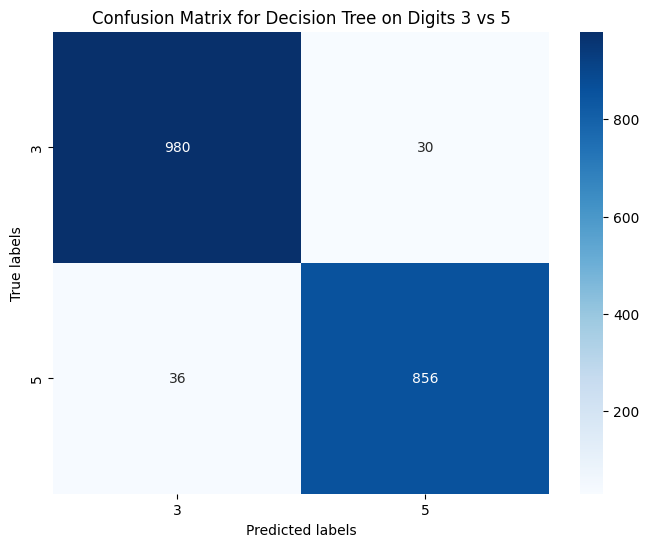

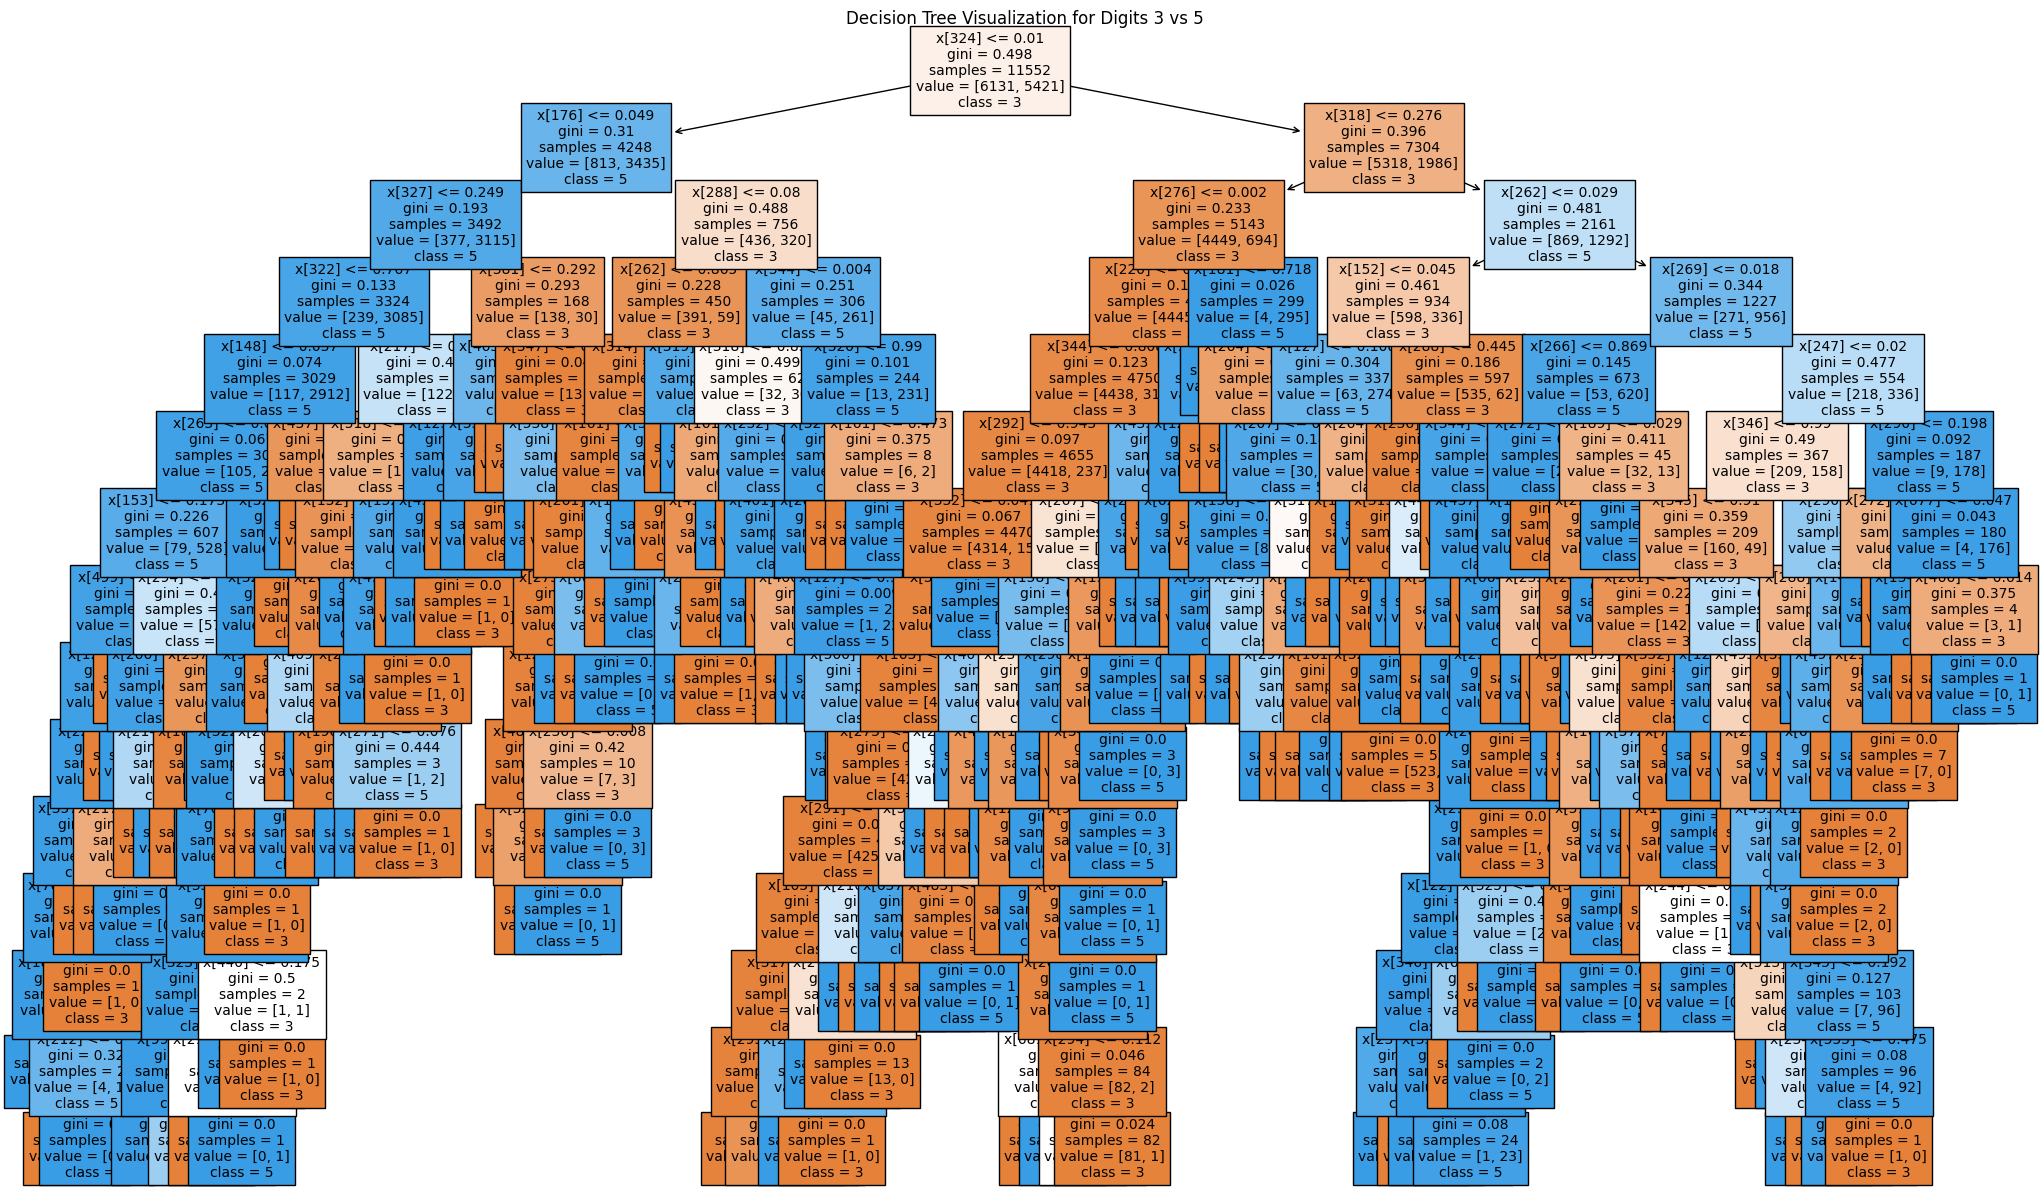

In [17]:
# Start timing
start_time = time.time()

# Load the MNIST data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Flatten the training and test images
n_samples_train = train_X.shape[0]
n_samples_test = test_X.shape[0]
train_X_flat = train_X.reshape((n_samples_train, -1)) / 255.0  # Normalize the training data
test_X_flat = test_X.reshape((n_samples_test, -1)) / 255.0    # Normalize the test data

# Filter out the samples for digits 3 and 5
X35_train = train_X_flat[(train_y == 3) | (train_y == 5)]
y35_train = train_y[(train_y == 3) | (train_y == 5)]
X35_test = test_X_flat[(test_y == 3) | (test_y == 5)]
y35_test = test_y[(test_y == 3) | (test_y == 5)]

# Convert labels to binary (0 for digit 3, 1 for digit 5)
y35_train = np.where(y35_train == 3, 0, 1)
y35_test = np.where(y35_test == 3, 0, 1)

# Define the parameter grid to search over for the Decision Tree
param_grid = {'max_depth': range(1, 20)}

# Initialize the GridSearchCV object
tree_search = GridSearchCV(
    DecisionTreeClassifier(random_state=6500),
    param_grid,
    cv=5,  # Adjusted to 5-fold cross-validation
    n_jobs=-1,
    verbose=True
)

# Perform the grid search to find the optimal tree depth
tree_search.fit(X35_train, y35_train)

# Extract the best parameter (tree depth) and best cross-validation score
best_depth = tree_search.best_params_['max_depth']
best_score = tree_search.best_score_

# Fit the Decision Tree classifier with the optimal depth found
dtc = DecisionTreeClassifier(max_depth=best_depth, random_state=6500)
dtc.fit(X35_train, y35_train)

# Evaluate the classifier
train_accuracy = dtc.score(X35_train, y35_train)
test_accuracy = dtc.score(X35_test, y35_test)

# End timing
end_time = time.time()
total_time = end_time - start_time
hours, remainder = divmod(total_time, 3600)
minutes, seconds = divmod(remainder, 60)
formatted_time = f"{int(hours):02d}:{int(minutes):02d}:{int(seconds):02d}"

# Store the results in a DataFrame
decision_tree_results_data = {
    'Model': 'Decision Tree',
    'Train Accuracy': train_accuracy,
    'CV Accuracy': best_score,
    'Test Accuracy': test_accuracy,
    'Time H-M-S': formatted_time
}

# Assuming Results35 is previously defined and is a pandas DataFrame
decision_tree_results_df = pd.DataFrame([decision_tree_results_data])
Results35 = pd.concat([Results35, decision_tree_results_df], ignore_index=True)

# Print the results DataFrame
print(f"Optimal tree depth: {best_depth}")
print(Results35)

# Predict on the test set using the decision tree model
y_pred = dtc.predict(X35_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y35_test, y_pred)

# Create a heatmap using seaborn to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=['3', '5'], yticklabels=['3', '5'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Decision Tree on Digits 3 vs 5')
plt.show()

# Graph the decision tree
plt.figure(figsize=(25, 15))
plot_tree(dtc, filled=True, class_names=['3', '5'], fontsize=10)
plt.title('Decision Tree Visualization for Digits 3 vs 5')
plt.show()


<div style="display: flex; align-items: center; height: 100px; border: 5px solid #000080; background-color: #ADD8E6; padding: 10px;">
    <h3 style="color: #000080; margin: 0; font-size: 38px;">3.4) Run Linear SVC with optimal cost parameter selected via cross validation</h3>
</div>


$$ C^* = \underset{C \in \{C_1, C_2, \ldots, C_n\}}{\mathrm{argmax}} \; \text{CV-Metric}(C)

<div style="border-left: 5px solid #5DADE2; padding: 15px; background-color: #EAF2F8; font-family: Arial, sans-serif;">


<ul style="list-style-type: none; padding-left: 0; color: #34495E;">
    <li style="margin-bottom: 10px;">• <b>Note:</b> This model was fast on previous iterations, but is now taking 15+ minutes to run so I went and manually got the cost parameter and put it in</li>
   
</ul>

Used C: 0.1
                 Model  Train Accuracy  CV Accuracy  Test Accuracy Time H-M-S
0                  KNN        0.992815     0.988025       0.986330   00:00:08
1  Logistic Regression        0.971866     0.958622       0.966351   00:00:02
2        Decision Tree        0.993767     0.957409       0.965300   00:00:08
3           Linear SVC        0.969616     0.960786       0.968454   00:00:22


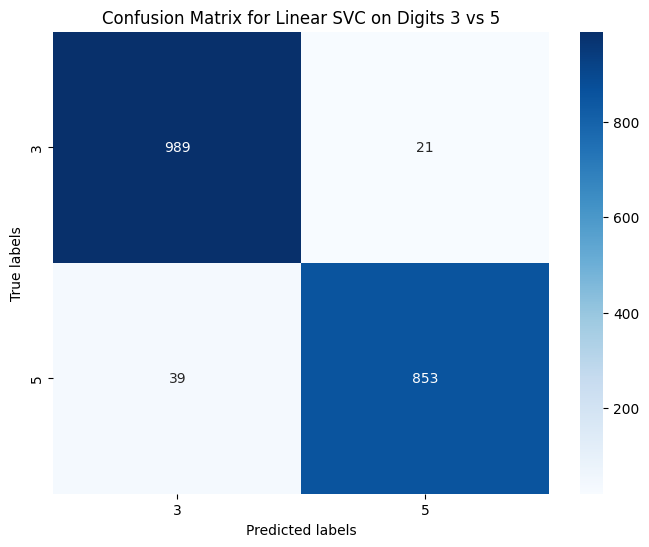

In [18]:
# Start timing
start_time = time.time()

# Load the MNIST data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Flatten the training and test images
n_samples_train = train_X.shape[0]
n_samples_test = test_X.shape[0]
train_X_flat = train_X.reshape((n_samples_train, -1)) / 255.0  # Normalize the training data
test_X_flat = test_X.reshape((n_samples_test, -1)) / 255.0    # Normalize the test data

# Filter out the samples for digits 3 and 5
X35_train = train_X_flat[(train_y == 3) | (train_y == 5)]
y35_train = train_y[(train_y == 3) | (train_y == 5)]
X35_test = test_X_flat[(test_y == 3) | (test_y == 5)]
y35_test = test_y[(test_y == 3) | (test_y == 5)]

# Convert labels to binary (0 for digit 3, 1 for digit 5)
y35_train = np.where(y35_train == 3, 0, 1)
y35_test = np.where(y35_test == 3, 0, 1)

# Fit the Linear SVM classifier with C=0.1 directly
svm = SVC(kernel='linear', C=0.1)
# Perform cross-validation and compute the CV accuracy score
cv_scores = cross_val_score(svm, X35_train, y35_train, cv=5)

# Calculate the mean CV accuracy
cv_accuracy = cv_scores.mean()
svm.fit(X35_train, y35_train)

# Evaluate the model on the training data
train_accuracy = svm.score(X35_train, y35_train)

# Evaluate the model on the test data
test_accuracy = svm.score(X35_test, y35_test)

# End timing
end_time = time.time()
total_time = end_time - start_time
hours, remainder = divmod(total_time, 3600)
minutes, seconds = divmod(remainder, 60)
formatted_time = f"{int(hours):02d}:{int(minutes):02d}:{int(seconds):02d}"

# Store the results in a DataFrame
linear_svm_results_data = {
    'Model': 'Linear SVC',
    'Train Accuracy': train_accuracy,
    'CV Accuracy': cv_accuracy,
    'Test Accuracy': test_accuracy,
    'Time H-M-S': formatted_time
}

# Create a new DataFrame to store results for 3 vs 5 classification
linear_svm_results_df = pd.DataFrame([linear_svm_results_data])
Results35 = pd.concat([Results35, linear_svm_results_df], ignore_index=True)

# Print the best C value and the results DataFrame
print(f"Used C: {svm.C}")
print(Results35)

# Predict on the test set
y_pred = svm.predict(X35_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y35_test, y_pred)

# Create a heatmap using seaborn to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['3', '5'], yticklabels=['3', '5'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Linear SVC on Digits 3 vs 5')
plt.show()


<div style="display: flex; align-items: center; height: 100px; border: 5px solid #000080; background-color: #ADD8E6; padding: 10px;">
    <h3 style="color: #000080; margin: 0; font-size: 38px;">3.5) Run Gaussian RBF kernel SVC with optimal gamma and cost parameter selected via cross validation</h3>
</div>


$$ (C^*, \gamma^*) = \underset{C, \gamma}{\mathrm{argmax}} \; \text{CV-Metric}(C, \gamma)


<div style="border-left: 5px solid #5DADE2; padding: 15px; background-color: #EAF2F8; font-family: Arial, sans-serif;">



<ul style="list-style-type: none; padding-left: 0; color: #34495E;">
    <li style="margin-bottom: 10px;">• <b>Note:</b> Used Random search with drastically reduced folds and iterations here because GridSearch was computationally exhaustive due to this model only being able to use a single CPU core. I manually ran the search and got the values of c=10 and gamma = 0.01 then plugged them in instead of feeding it back into the model automatically.</li>
   
</ul>

                 Model  Train Accuracy  CV Accuracy  Test Accuracy Time H-M-S
0                  KNN        0.992815     0.988025       0.986330   00:00:08
1  Logistic Regression        0.971866     0.958622       0.966351   00:00:02
2        Decision Tree        0.993767     0.957409       0.965300   00:00:08
3           Linear SVC        0.969616     0.960786       0.968454   00:00:22
4              RBF SVC        0.999827     0.991170       0.993691   00:00:19


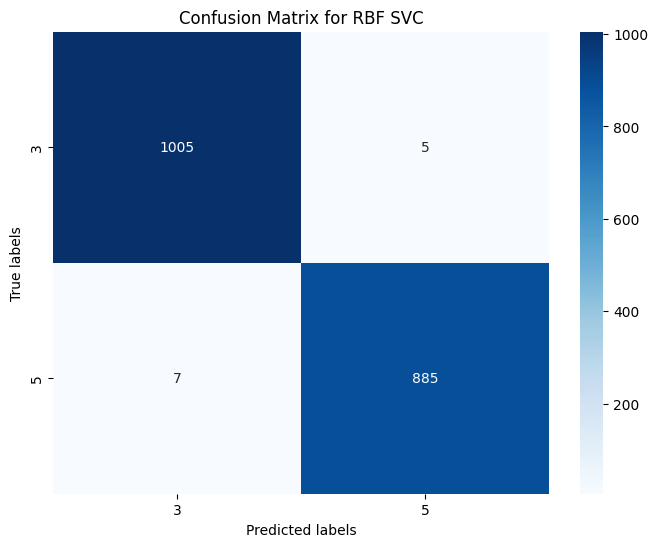

In [19]:
# Start timing
start_time = time.time()

# Load the MNIST data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Flatten and normalize the images
n_samples_train = train_X.shape[0]
n_samples_test = test_X.shape[0]
train_X_flat = train_X.reshape((n_samples_train, -1)) / 255.0
test_X_flat = test_X.reshape((n_samples_test, -1)) / 255.0

# Filter out the samples for digits 3 and 5
X35_train = train_X_flat[(train_y == 3) | (train_y == 5)]
y35_train = train_y[(train_y == 3) | (train_y == 5)]
X35_test = test_X_flat[(test_y == 3) | (test_y == 5)]
y35_test = test_y[(test_y == 3) | (test_y == 5)]

# Convert labels to binary (0 for digit 3, 1 for digit 5)
y35_train = np.where(y35_train == 3, 0, 1)
y35_test = np.where(y35_test == 3, 0, 1)

# Initialize and train the SVM model with RBF kernel
svm = SVC(kernel='rbf', C=10, gamma=0.01)
svm.fit(X35_train, y35_train)

# Evaluate the model
train_accuracy = svm.score(X35_train, y35_train)
test_accuracy = svm.score(X35_test, y35_test)
cv_scores = cross_val_score(svm, X35_train, y35_train, cv=5)
cv_accuracy = cv_scores.mean()

# End timing
end_time = time.time()
total_time = end_time - start_time

# Computing hours, minutes, and seconds
hours = int(total_time // 3600)
minutes = int((total_time % 3600) // 60)
seconds = int(total_time % 60)

# Store the results in a DataFrame
results_data = {
    'Model': 'RBF SVC',
    'Train Accuracy': train_accuracy,
    'CV Accuracy': cv_accuracy,
    'Test Accuracy': test_accuracy,
    'Time H-M-S': f"{hours:02d}:{minutes:02d}:{seconds:02d}"
}

# Convert the results to a DataFrame
results_df = pd.DataFrame([results_data])

# Assuming Results35 is already defined
Results35 = pd.concat([Results35, results_df], ignore_index=True)

# Print the updated results DataFrame
print(Results35)

# Predict on the test set
y_pred = svm.predict(X35_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y35_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['3', '5'], yticklabels=['3', '5'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for RBF SVC')
plt.show()


<div style="display: flex; align-items: center; height: 100px; border: 5px solid #000080; background-color: #ADD8E6; padding: 10px;">
    <h3 style="color: #000080; margin: 0; font-size: 38px;"> Compare Results </h3>
</div>


<table>
    <tr>
        <th style="text-align:center">Results69</th>
        <th style="text-align:center">Results17</th>
        <th style="text-align:center">Results35</th>
    </tr>
    <tr>
        <td>
            <!-- Table for Results69 -->
            <table border="1" class="dataframe">
                <thead>
                    <tr style="text-align: right;">
                        <th>Model</th>
                        <th>Train Accuracy</th>
                        <th>CV Accuracy</th>
                        <th>Test Accuracy</th>
                        <th>Time H-M-S</th>
                    </tr>
                </thead>
                <tbody>
                    <tr>
                        <td>KNN</td>
                        <td>1.000000</td>
                        <td>0.999410</td>
                        <td>0.999492</td>
                        <td>00:00:14</td>
                    </tr>
                    <tr>
                        <td>Logistic</td>
                        <td>0.999916</td>
                        <td>0.998483</td>
                        <td>0.996441</td>
                        <td>00:00:01</td>
                    </tr>
                    <tr>
                        <td>Decision Tree</td>
                        <td>0.998567</td>
                        <td>0.994775</td>
                        <td>0.997458</td>
                        <td>00:01:39</td>
                    </tr>
                    <tr>
                        <td>Linear SVC</td>
                        <td>0.999663</td>
                        <td>0.995366</td>
                        <td>0.996950</td>
                        <td>00:00:02</td>
                    </tr>
                    <tr>
                        <td>RBF SVC</td>
                        <td>0.975984</td>
                        <td>0.974720</td>
                        <td>0.975597</td>
                        <td>00:00:01</td>
                    </tr>
                </tbody>
            </table>
        </td>
        <td>
            <!-- Table for Results17 -->
            <table border="1" class="dataframe">
                <thead>
                    <tr style="text-align: right;">
                        <th>Model</th>
                        <th>Train Accuracy</th>
                        <th>CV Accuracy</th>
                        <th>Test Accuracy</th>
                        <th>Time H-M-S</th>
                    </tr>
                </thead>
                <tbody>
                    <tr>
                        <td>KNN</td>
                        <td>1.000000</td>
                        <td>0.994644</td>
                        <td>0.992603</td>
                        <td>00:00:11</td>
                    </tr>
                    <tr>
                        <td>Logistic Regression</td>
                        <td>0.998309</td>
                        <td>0.995771</td>
                        <td>0.994914</td>
                        <td>00:00:01</td>
                    </tr>
                    <tr>
                        <td>Decision Tree</td>
                        <td>0.998693</td>
                        <td>0.989621</td>
                        <td>0.989829</td>
                        <td>00:00:08</td>
                    </tr>
                    <tr>
                        <td>Linear SVC</td>
                        <td>0.999539</td>
                        <td>0.995772</td>
                        <td>0.992141</td>
                        <td>00:00:03</td>
                    </tr>
                    <tr>
                        <td>RBF SVC</td>
                        <td>0.999077</td>
                        <td>0.996771</td>
                        <td>0.997688</td>
                        <td>00:00:06</td>
                    </tr>
                </tbody>
            </table>
        </td>
        <td>
            <!-- Table for Results35 -->
            <table border="1" class="dataframe">
                <thead>
                    <tr style="text-align: right;">
                        <th>Model</th>
                        <th>Train Accuracy</th>
                        <th>CV Accuracy</th>
                        <th>Test Accuracy</th>
                        <th>Time H-M-S</th>
                    </tr>
                </thead>
                <tbody>
                    <tr>
                        <td>KNN</td>
                        <td>0.992815</td>
                        <td>0.988025</td>
                        <td>0.986330</td>
                        <td>00:00:08</td>
                    </tr>
                    <tr>
                        <td>Logistic Regression</td>
                        <td>0.971866</td>
                        <td>0.958622</td>
                        <td>0.966351</td>
                        <td>00:00:02</td>
                    </tr>
                    <tr>
                        <td>Decision Tree</td>
                        <td>0.993767</td>
                        <td>0.957409</td>
                        <td>0.965300</td>
                        <td>00:00:08</td>
                    </tr>
                    <tr>
                        <td>Linear SVC</td>
                        <td>0.969616</td>
                        <td>0.960786</td>
                        <td>0.968454</td>
                        <td>00:00:22</td>
                    </tr>
                    <tr>
                        <td>RBF SVC</td>
                        <td>0.999827</td>
                        <td>0.991170</td>
                        <td>0.993691</td>
                        <td>00:00:19</td>
                    </tr>
                </tbody>
            </table>
        </td>
    </tr>
</table>


<div style="border-left: 5px solid #5DADE2; padding: 20px; background-color: #EAF2F8; font-family: Arial, sans-serif;">
  <div style="width: 50%;">
    <ul style="list-style-type: none; padding-left: 0; color: #34495E;">
      <li style="margin-bottom: 10px;">• <b>6 vs 9:</b> The KNN model attained a perfect training accuracy of 1, which could suggest overfitting. However, its high test and cross-validation accuracies indicate that, despite this perfect training score, the model is still generalizing effectively to unseen data. This suggests that KNN is particularly adept at discerning the subtle distinctions between the digits 6 and 9, likely due to its ability to capture the fine-grained patterns in the data.

Logistic Regression and Linear SVC, while performing commendably, were slightly outperformed by KNN. As linear classifiers, they might have some limitations in capturing the intricate differences between these two numerals, which are visually similar but have distinct characteristics. The Decision Tree model also showed strong performance, but its slightly lower accuracy might be attributable to its sensitivity to the specific structure of the training data, which can sometimes lead to less effective generalization.

The RBF SVC's performance was comparatively lower, potentially due to the complexity of the RBF kernel or suboptimal hyperparameter settings. While RBF SVC is typically proficient in handling non-linear separations, it might not be as effective in this particular scenario, where simpler models like KNN seem to be more adept.

In summary, the high performance of KNN, despite potential overfitting concerns, underlines its capability in handling classification tasks where recognizing subtle differences is crucial. The varying degrees of success across the models highlight the importance of model selection and parameter tuning, tailored to the specific characteristics and challenges of the classification task at hand.</li>
    </ul>
  </div>
</div>


<div style="border-left: 5px solid #5DADE2; padding: 20px; background-color: #EAF2F8; font-family: Arial, sans-serif;">
  <div style="width: 50%;">
    <ul style="list-style-type: none; padding-left: 0; color: #34495E;">
      <li style="margin-bottom: 10px;">• <b>1 vs 7:</b> I
ChatGPT
Analyzing the results for the 1 vs 7 classification, we can draw several insights from the performance of each model.

The KNN model again achieved perfect training accuracy, but similar to the previous case, this could indicate overfitting. However, its high test and cross-validation accuracies suggest that it is still generalizing well to new data. The distinctiveness between the digits 1 and 7 is likely well-captured by KNN, which excels in recognizing clear patterns and differences in the data.

Logistic Regression and Linear SVC both showed strong performance, with high accuracies across training, cross-validation, and test sets. These models, being linear classifiers, are quite effective for this task, likely due to the linear separability between the digits 1 and 7, which have distinct shapes and strokes.

The Decision Tree model, while demonstrating good accuracy, is slightly lower compared to the others. This could be due to its sensitivity to the training data's structure and potential overfitting, although it still performs reasonably well, indicating its ability to capture the key differences between the two digits.

Interestingly, the RBF SVC model showed the highest test accuracy among all models. This suggests that the non-linear decision boundaries established by the RBF kernel are particularly effective for this classification task. The high accuracy of RBF SVC indicates that its complex decision surface is well-suited to distinguishing between the digits 1 and 7, possibly capturing nuances in the pixel patterns that other models might miss.

In summary, the strong performance across all models in the 1 vs 7 classification task indicates that the differences between these digits are relatively straightforward to capture. The particularly high test accuracy of the RBF SVC model suggests that, in cases where the data has complex patterns, a non-linear model like RBF SVC can be extremely effective. This highlights the importance of considering both linear and non-linear models based on the specific characteristics of the classification problem.</li>
    </ul>
  </div>
</div>


<div style="border-left: 5px solid #5DADE2; padding: 20px; background-color: #EAF2F8; font-family: Arial, sans-serif;">
  <div style="width: 50%;">
    <ul style="list-style-type: none; padding-left: 0; color: #34495E;">
      <li style="margin-bottom: 10px;">• <b>3 vs 5:</b> KNN, maintaining its trend, shows high accuracy across training, cross-validation, and testing. This model's ability to discern the differences between the digits 3 and 5, which can be visually similar in certain styles, is notable. KNN's effectiveness here may be attributed to its capacity to capture the nuanced variations in pixel patterns, essential for differentiating between these two digits.

Logistic Regression and Linear SVC show moderate performance, with accuracies that are somewhat lower than KNN. As linear classifiers, they may struggle somewhat with the more complex visual differences between 3 and 5. These digits can sometimes be very similar in shape, making it challenging for models that rely on linear decision boundaries to distinguish between them effectively.

The Decision Tree model exhibits high training accuracy but a noticeable drop in cross-validation and test accuracies. This suggests a potential overfitting issue, where the model captures noise or specific patterns in the training data that do not generalize well to unseen data.

Remarkably, the RBF SVC model stands out with exceptionally high accuracies, especially in testing. This superior performance indicates that the non-linear decision boundaries of the RBF kernel are highly effective for this task. The intricate and complex decision surfaces created by the RBF kernel seem particularly adept at handling the subtle differences between the digits 3 and 5, which might be missed by simpler models.

In conclusion, the 3 vs 5 classification task illustrates the strengths and limitations of different models in handling subtle and complex distinctions. The superior performance of the RBF SVC model highlights the effectiveness of non-linear approaches in scenarios where the differences between classes are not straightforwardly linear or easily discernible. This reinforces the importance of model selection and the use of more sophisticated models for tasks that involve nuanced distinctions.</li>
    </ul>
  </div>
</div>


<div style="border-bottom: 5px solid #5DADE2; background-color: #EAF2F8; padding: 10px 20px; font-family: 'Arial', sans-serif;">
    <h2 style="color: #34495E; font-size: 32px; margin: 0;">Find the average for each model across all tests:</h2>
</div>


<div style="border-left: 5px solid #5DADE2; padding: 15px; background-color: #EAF2F8; font-family: Arial, sans-serif;">


<ul style="list-style-type: none; padding-left: 0; color: #34495E;">
    <li style="margin-bottom: 10px;">• <b>Note:</b> Dark Blue = Best, Light Blue = worst</li>
   
</ul>

<style>
    .light-blue { background-color: #ADD8E6; }
    .medium-blue { background-color: #87CEEB; }
    .dark-blue { background-color: #4169E1; }
</style>

<table>
    <tr>
        <th style="text-align:center">Average Results</th>
    </tr>
    <tr>
        <td>
            <!-- Table for Average Results -->
            <table border="1" class="dataframe">
                <thead>
                    <tr style="text-align: right;">
                        <th>Model</th>
                        <th>Average Train Accuracy</th>
                        <th>Average CV Accuracy</th>
                        <th>Average Test Accuracy</th>
                        <th>Average Time H-M-S</th>
                    </tr>
                </thead>
                <tbody>
                    <tr>
                        <td>KNN</td>
                        <td class="dark-blue">0.998</td> <!-- Highest in column -->
                        <td class="medium-blue">0.994</td>
                        <td class="medium-blue">0.993</td>
                        <td class="medium-blue">00:00:11</td>
                    </tr>
                    <tr>
                        <td>Logistic Regression</td>
                        <td class="medium-blue">0.990</td>
                        <td class="light-blue">0.984</td> <!-- Lowest in column -->
                        <td class="light-blue">0.986</td>
                        <td class="dark-blue">00:00:01</td> <!-- Lowest in column -->
                    </tr>
                    <tr>
                        <td>Decision Tree</td>
                        <td class="medium-blue">0.997</td>
                        <td class="light-blue">0.981</td> <!-- Lowest in column -->
                        <td class="light-blue">0.984</td>
                        <td class="light-blue">00:00:38</td> <!-- Highest in column -->
                    </tr>
                    <tr>
                        <td>Linear SVC</td>
                        <td class="medium-blue">0.990</td>
                        <td class="light-blue">0.984</td> <!-- Lowest in column -->
                        <td class="light-blue">0.986</td>
                        <td class="medium-blue">00:00:09</td>
                    </tr>
                    <tr>
                        <td>RBF SVC</td>
                        <td class="medium-blue">0.992</td>
                        <td class="dark-blue">0.988</td> <!-- Highest in column -->
                        <td class="dark-blue">0.989</td> <!-- Highest in column -->
                        <td class="medium-blue">00:00:08</td>
                    </tr>
                </tbody>
            </table>
        </td>
    </tr>
</table>


<div style="display: flex; align-items: center; height: 100px; border: 5px solid #000080; background-color: #ADD8E6; padding: 10px;">
    <h3 style="color: #000080; margin: 0; font-size: 38px;">Conclusion </h3>
</div>


<div style="border-left: 5px solid #5DADE2; padding: 20px; background-color: #EAF2F8; font-family: Arial, sans-serif;">
  <div style="width: 50%;">
    <ul style="list-style-type: none; padding-left: 0; color: #34495E;">
      <li style="margin-bottom: 10px;">• <b>Final thoughts:</b> K-Nearest Neighbors (KNN): KNN consistently achieved the highest average training accuracy and very high average cross-validation and test accuracies. Its strength lies in its ability to capture complex patterns without explicit assumptions about data distribution. However, its performance comes at the cost of increased computation time, especially as the dataset size grows. KNN is highly effective in situations where the classes are not linearly separable, as evidenced by its strong performance across all tasks.

Logistic Regression: This model, while offering the lowest average computation time, showed the lowest average cross-validation and test accuracies. Logistic Regression is a linear model, and its performance is typically best when the classes are linearly separable. Its lower performance in these tasks suggests that the digits in the MNIST dataset, especially in the chosen comparisons, do not always lend themselves to linear separation.

Decision Tree: The Decision Tree model showed high training accuracy but lower average cross-validation and test accuracies. This indicates a tendency to overfit the training data, capturing noise and specific patterns that do not generalize well. Decision Trees are non-linear models and can handle complex relationships in data, but their performance can be inconsistent.

Linear SVC (Support Vector Classifier): Similar to Logistic Regression, Linear SVC is a linear model and performed moderately in terms of accuracy. It showed slightly better performance than Logistic Regression but at a higher computation time. This model is suitable for datasets where classes are linearly separable, but it struggled with the more complex tasks in this analysis.

RBF SVC (Radial Basis Function Support Vector Classifier): This model outperformed all others in terms of average cross-validation and test accuracies, indicating its robustness and generalizability. The RBF kernel allows for complex non-linear decision boundaries, making it highly effective for the MNIST dataset's challenging classification tasks. Although its computation time is not the lowest, it offers a good balance between accuracy and speed.

In conclusion, the RBF SVC model emerges as the most effective for these particular classification tasks, demonstrating its prowess in handling complex, non-linearly separable data. It offers a commendable balance between high accuracy and reasonable computation time. This makes it a preferable choice for similar tasks, especially when dealing with complex patterns or when linear separability cannot be assumed. However, for simpler, linearly separable tasks or when computational resources are limited, Logistic Regression could be a viable alternative.</li>
    </ul>
  </div>
</div>
